#### 1

#### 2

#### 3

#### 4

#### Bactesting

In [44]:
# https://medium.com/@deepml1818/multi-leg-options-strategy-backtesting-with-python-e112baa36038

In [74]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 100)

# Get historical options data for a stock (e.g., AAPL)
ticker = 'AAPL'
stock = yf.Ticker(ticker)

# Fetch option chain for a specific expiration date
expiration_date = '2025-05-16'
options_chain = stock.option_chain(expiration_date)

# Call and Put options data
calls = options_chain.calls
puts = options_chain.puts

print(calls.head())
print(puts.head())

        contractSymbol             lastTradeDate  strike  lastPrice     bid  \
0  AAPL250516C00100000 2025-01-29 17:47:12+00:00   100.0     137.76  127.10   
1  AAPL250516C00105000 2025-01-14 20:49:31+00:00   105.0     129.48  122.15   
2  AAPL250516C00115000 2025-01-28 18:41:21+00:00   115.0     125.29  112.30   
3  AAPL250516C00130000 2025-01-31 14:34:00+00:00   130.0     117.00   97.55   
4  AAPL250516C00135000 2025-01-08 15:51:36+00:00   135.0     110.62   92.70   

      ask  change  percentChange  volume  openInterest  impliedVolatility  \
0  128.10     0.0            0.0     1.0             2           0.885743   
1  123.15     0.0            0.0     3.0             4           0.845216   
2  113.05     0.0            0.0     2.0             1           0.759280   
3   98.30     0.0            0.0     1.0             1           0.664066   
4   93.50     0.0            0.0     NaN            67           0.641361   

   inTheMoney contractSize currency  
0        True      REGUL

In [5]:
# Define the strikes for the Iron Condor
short_call_strike = 150
long_call_strike = 160
short_put_strike = 140
long_put_strike = 130

# Fetch the option prices for the strikes
short_call = calls[calls['strike'] == short_call_strike]['lastPrice'].values[0]
long_call = calls[calls['strike'] == long_call_strike]['lastPrice'].values[0]
short_put = puts[puts['strike'] == short_put_strike]['lastPrice'].values[0]
long_put = puts[puts['strike'] == long_put_strike]['lastPrice'].values[0]

# Calculate the net credit received
net_credit = (short_call - long_call) + (short_put - long_put)
print(f"Net Credit for Iron Condor: ${net_credit}")

# Backtest over a range of stock prices at expiration
stock_prices = np.arange(120, 180, 1)
payoff = []


Net Credit for Iron Condor: $9.340000000000003


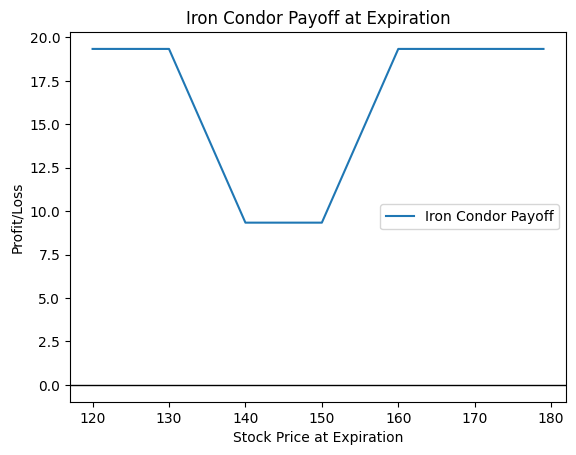

In [6]:
for price in stock_prices:
    call_payoff = max(0, price - short_call_strike) - max(0, price - long_call_strike)
    put_payoff = max(0, short_put_strike - price) - max(0, long_put_strike - price)
    total_payoff = call_payoff + put_payoff + net_credit
    payoff.append(total_payoff)

# Plot the payoff diagram
plt.plot(stock_prices, payoff, label='Iron Condor Payoff')
plt.axhline(0, color='black', lw=1)
plt.title('Iron Condor Payoff at Expiration')
plt.xlabel('Stock Price at Expiration')
plt.ylabel('Profit/Loss')
plt.legend()
plt.show()

Net Debit for Straddle: $74.82


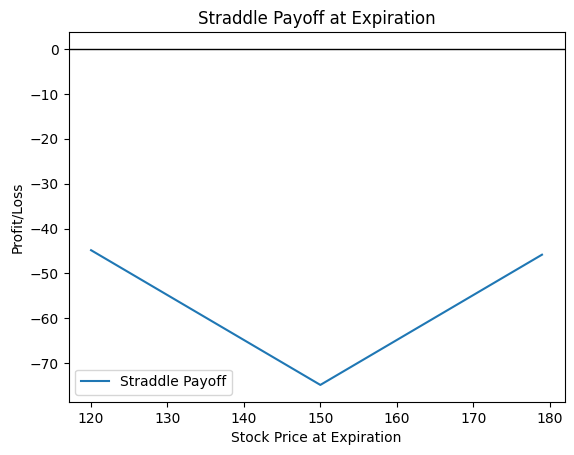

In [8]:
#Define the strike for the Straddle
strike_price = 150

# Fetch the option prices
call_price = calls[calls['strike'] == strike_price]['lastPrice'].values[0]
put_price = puts[puts['strike'] == strike_price]['lastPrice'].values[0]

# Calculate the net debit (cost) for the straddle
net_debit = call_price + put_price
print(f"Net Debit for Straddle: ${net_debit}")

# Backtest over a range of stock prices at expiration
payoff = []

for price in stock_prices:
    call_payoff = max(0, price - strike_price)
    put_payoff = max(0, strike_price - price)
    total_payoff = call_payoff + put_payoff - net_debit
    payoff.append(total_payoff)

# Plot the payoff diagram
plt.plot(stock_prices, payoff, label='Straddle Payoff')
plt.axhline(0, color='black', lw=1)
plt.title('Straddle Payoff at Expiration')
plt.xlabel('Stock Price at Expiration')
plt.ylabel('Profit/Loss')
plt.legend()
plt.show()

Net Debit for Butterfly Spread: $0.5099999999999909


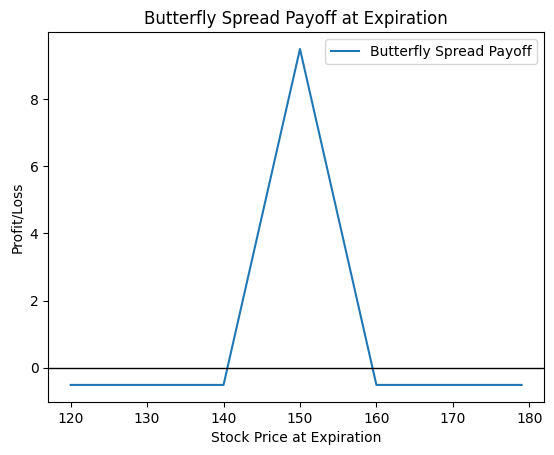

In [9]:
# Define the strikes for the Butterfly Spread
lower_strike = 140
middle_strike = 150
upper_strike = 160

# Fetch the option prices
lower_call = calls[calls['strike'] == lower_strike]['lastPrice'].values[0]
middle_call = calls[calls['strike'] == middle_strike]['lastPrice'].values[0]
upper_call = calls[calls['strike'] == upper_strike]['lastPrice'].values[0]

# Calculate the net debit for the butterfly spread
net_debit = lower_call - 2 * middle_call + upper_call
print(f"Net Debit for Butterfly Spread: ${net_debit}")

# Backtest over a range of stock prices at expiration
payoff = []

for price in stock_prices:
    lower_payoff = max(0, price - lower_strike)
    middle_payoff = 2 * max(0, price - middle_strike)
    upper_payoff = max(0, price - upper_strike)
    total_payoff = lower_payoff - middle_payoff + upper_payoff - net_debit
    payoff.append(total_payoff)

# Plot the payoff diagram
plt.plot(stock_prices, payoff, label='Butterfly Spread Payoff')
plt.axhline(0, color='black', lw=1)
plt.title('Butterfly Spread Payoff at Expiration')
plt.xlabel('Stock Price at Expiration')
plt.ylabel('Profit/Loss')
plt.legend()
plt.show()

#### Intro to Mibian

In [1]:
import mibian

In [4]:
underlying_price = 8572
call_strike = 8700
put_strike = 8500
call_price = 616.05
put_price = 654.05
interest_rate = 0 #(as we are taking futures prices as underlying)
days_to_expiry = 31

In [5]:
# syntax to write the function to calculate implied volatility for Call Option and Put Option would be —

# mibian.BS([Underlying Price, Call / Price Strike Price, Interest Rate, Days To Expiration],
# Call / Put Price)


In [6]:
c = mibian.BS([8572, 8700, 0, 31], callPrice= 616.05)
print(c.impliedVolatility)

p = mibian.BS([8572, 8500, 0, 31], putPrice= 654.05)
print(p.impliedVolatility)

67.64984130859375
69.59056854248047


In [7]:
# syntax to write the function to calculate other greeks for Call / Put Option —

# mibian.BS([Underlying Price, Call / Put Strike Price, Interest Rate, Days To Expiration], 
# Call / Put Volatility)

In [8]:
c = mibian.BS([8572, 8700, 0, 31], volatility = 67.65)
print(c.callPrice)
print(c.callDelta)
print(c.callTheta)
print(c.vega)
print(c.gamma)

616.053446760709
0.5093328435093478
-10.871360383629481
9.963404933998929
0.00023599718695036784


In [9]:
p = mibian.BS([8572, 8500, 0, 31], volatility = 69.60)
print(p.callPrice)
print(p.callDelta)
print(p.callTheta)
print(p.vega)
print(p.gamma)

726.1415210663013
0.5568559780281406
-11.073976077528648
9.864748804695061
0.0002271138592604518


#### Getting Options Data

In [ ]:
# https://www.codearmo.com/python-tutorial/options-trading-getting-options-data-yahoo-finance

In this article we will show how to get stock options data from Yahoo Finance. In order to do this we will use the Pandas Datareader package. You can find installation steps here.

 

It is also worth noting that options data bid/ ask prices will only be available during trading hours 9.30am ET - 4pm ET and also bear in mind that the data is on a short delay of approximately 15 minutes. 

In [12]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np

FB = web.YahooOptions('AAPL')

In [14]:
for exp in FB.expiry_dates:
#      print(exp.isoformat())
    print(exp)

RemoteDataError: Unable to read URL: https://query1.finance.yahoo.com/v7/finance/options/AAPL
Response Text:
b'Too Many Requests\r\n'

In [17]:
# https://aroussi.com/post/download-options-data
import yfinance as yf
rel = yf.Ticker("RELIANCE.NS")

In [19]:
# rel.info

In [21]:
hist = rel.history(period="max")
hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1996-01-01 00:00:00+05:30,3.671327,3.691027,3.647150,3.684759,104121369,0.0,0.0
1996-01-02 00:00:00+05:30,3.675804,3.693713,3.629241,3.656104,168743308,0.0,0.0
1996-01-03 00:00:00+05:30,3.716099,3.885338,3.675804,3.683863,209323879,0.0,0.0
1996-01-04 00:00:00+05:30,3.648942,3.660582,3.600587,3.649837,216900264,0.0,0.0
1996-01-05 00:00:00+05:30,3.635509,3.635509,3.593423,3.624764,166708467,0.0,0.0


In [22]:
# Show only actions (dividends + splits):
rel.actions

,Dividends,Stock Splits
Date,,
1996-05-24 00:00:00+05:30,0.371479,0.0
1997-05-16 00:00:00+05:30,0.804871,0.0
1997-10-27 00:00:00+05:30,0.000000,2.0
1998-05-06 00:00:00+05:30,0.866784,0.0
1999-05-07 00:00:00+05:30,0.928697,0.0
2000-04-06 00:00:00+05:30,0.495305,0.0
2001-04-26 00:00:00+05:30,0.526262,0.0
2002-10-23 00:00:00+05:30,0.588175,0.0
2003-05-23 00:00:00+05:30,0.619131,0.0


In [23]:
# Show only dividents:
rel.dividends

Date
1996-05-24 00:00:00+05:30    0.371479
1997-05-16 00:00:00+05:30    0.804871
1998-05-06 00:00:00+05:30    0.866784
1999-05-07 00:00:00+05:30    0.928697
2000-04-06 00:00:00+05:30    0.495305
2001-04-26 00:00:00+05:30    0.526262
2002-10-23 00:00:00+05:30    0.588175
2003-05-23 00:00:00+05:30    0.619131
2004-05-20 00:00:00+05:30    0.650088
2005-05-12 00:00:00+05:30    1.857394
2006-06-01 00:00:00+05:30    1.238263
2007-03-21 00:00:00+05:30    2.724178
2008-05-08 00:00:00+05:30    3.219483
2009-10-16 00:00:00+05:30    3.219483
2010-05-10 00:00:00+05:30    1.733568
2011-05-05 00:00:00+05:30    3.962440
2012-05-31 00:00:00+05:30    4.210093
2013-05-10 00:00:00+05:30    4.457745
2014-05-16 00:00:00+05:30    2.352699
2015-05-08 00:00:00+05:30    2.476525
2016-03-17 00:00:00+05:30    5.200703
2017-07-13 00:00:00+05:30    5.448355
2018-06-27 00:00:00+05:30    2.971830
2019-08-02 00:00:00+05:30    6.438965
2020-07-02 00:00:00+05:30    6.500000
2021-06-11 00:00:00+05:30    3.500000
2022-08

In [24]:
# only splits:
rel.splits

Date
1997-10-27 00:00:00+05:30    2.0
2009-11-26 00:00:00+05:30    2.0
2017-09-07 00:00:00+05:30    2.0
2024-10-28 00:00:00+05:30    2.0
Name: Stock Splits, dtype: float64

In [25]:
rel.financials

,2024-03-31,2023-03-31,2022-03-31,2021-03-31,2020-03-31
Tax Effect Of Unusual Items,4065480000.0,-3185730000.0,8188344000.0,3659070000.0,NaN
Tax Rate For Calcs,0.2455,0.2185,0.2004,0.0345,NaN
Normalized EBITDA,1756750000000.0,1547650000000.0,1222880000000.0,893340000000.0,NaN
Total Unusual Items,16560000000.0,-14580000000.0,40860000000.0,106060000000.0,NaN
Total Unusual Items Excluding Goodwill,16560000000.0,-14580000000.0,40860000000.0,106060000000.0,NaN
Net Income From Continuing Operation Net Minority Interest,696210000000.0,662840000000.0,590440000000.0,491280000000.0,NaN
Reconciled Depreciation,508320000000.0,403030000000.0,297820000000.0,265720000000.0,NaN
Reconciled Cost Of Revenue,6745990000000.0,6718980000000.0,5316780000000.0,3390610000000.0,NaN
EBITDA,1773310000000.0,1533070000000.0,1263740000000.0,999400000000.0,NaN
EBIT,1264990000000.0,1130040000000.0,965920000000.0,733680000000.0,NaN


In [26]:
rel.balance_sheet

,2024-03-31,2023-03-31,2022-03-31,2021-03-31,2020-03-31
Ordinary Shares Number,13532218028.0,13532188028.0,13531988028.0,13524137628.0,NaN
Share Issued,13532218028.0,13532188028.0,13531988028.0,13524137628.0,NaN
Net Debt,2310820000000.0,2798100000000.0,2327960000000.0,2373050000000.0,NaN
Total Debt,3461420000000.0,3343920000000.0,2819740000000.0,2601250000000.0,NaN
Tangible Book Value,4331070000000.0,3850770000000.0,5476870000000.0,5551980000000.0,NaN
...,...,...,...,...,...
Cash Cash Equivalents And Short Term Investments,2113100000000.0,1612330000000.0,1529000000000.0,1747420000000.0,NaN
Other Short Term Investments,1177700000000.0,1270770000000.0,1193910000000.0,1602360000000.0,NaN
Cash And Cash Equivalents,935400000000.0,341560000000.0,335090000000.0,145060000000.0,NaN
Cash Equivalents,195280000000.0,301840000000.0,246890000000.0,60390000000.0,NaN


In [27]:
rel.cashflow

,2024-03-31,2023-03-31,2022-03-31,2021-03-31,2020-03-31
Free Cash Flow,59050000000.0,-259560000000.0,105090000000.0,-788790000000.0,NaN
Repayment Of Debt,-350550000000.0,-290590000000.0,-406470000000.0,-872400000000.0,NaN
Issuance Of Debt,696100000000.0,359360000000.0,593430000000.0,332110000000.0,NaN
Issuance Of Capital Stock,70000000.0,400000000.0,397670000000.0,132150000000.0,NaN
Capital Expenditure,-1528830000000.0,-1409880000000.0,-1001450000000.0,-1058370000000.0,NaN
End Cash Position,972250000000.0,686640000000.0,361780000000.0,173970000000.0,NaN
Other Cash Adjustment Outside Changein Cash,7200000000.0,-17660000000.0,9410000000.0,240000000.0,NaN
Beginning Cash Position,686640000000.0,361780000000.0,173970000000.0,309200000000.0,NaN
Changes In Cash,278410000000.0,342520000000.0,178400000000.0,-135470000000.0,NaN
Financing Cash Flow,-166460000000.0,104550000000.0,172890000000.0,1019040000000.0,NaN


In [28]:
rel.options

()

In [29]:
rel.option_chain('2019-06-07')

ValueError: Expiration `2019-06-07` cannot be found. Available expirations are: []

#### Using NSELIB

In [75]:
from nselib import capital_market
from nselib import derivatives
import dtale
import talib

In [3]:
derivatives.expiry_dates_future()

['27-Feb-2025', '27-Mar-2025', '24-Apr-2025']

In [76]:
derivatives.expiry_dates_option_index()

{'NIFTY': ['06-Feb-2025',
  '13-Feb-2025',
  '20-Feb-2025',
  '27-Feb-2025',
  '06-Mar-2025',
  '27-Mar-2025',
  '24-Apr-2025',
  '26-Jun-2025',
  '25-Sep-2025',
  '24-Dec-2025',
  '25-Jun-2026',
  '31-Dec-2026',
  '24-Jun-2027',
  '30-Dec-2027',
  '29-Jun-2028',
  '28-Dec-2028',
  '28-Jun-2029',
  '27-Dec-2029'],
 'FINNIFTY': ['27-Feb-2025', '27-Mar-2025', '24-Apr-2025'],
 'BANKNIFTY': ['27-Feb-2025',
  '27-Mar-2025',
  '24-Apr-2025',
  '26-Jun-2025',
  '25-Sep-2025',
  '24-Dec-2025']}

In [5]:
derivatives.fii_derivatives_statistics('22-01-2025')

,fii_derivatives,buy_contracts,buy_value_in_Cr,sell_contracts,sell_value_in_Cr,open_contracts,open_contracts_value_in_Cr
0,FINNIFTY FUTURES,52.0,3.02,48.0,2.71,1124.0,64.68
1,BANKNIFTY FUTURES,22569.0,1718.98,22749.0,2016.21,103193.0,9040.82
2,MIDCPNIFTY FUTURES,5230.0,348.74,9032.0,580.36,78818.0,4771.50
3,NIFTYNXT50 FUTURES,193.0,12.95,376.0,24.52,777.0,49.05
4,NIFTY FUTURES,35947.0,2272.84,32137.0,2703.26,355988.0,26295.37
6,INDEX OPTIONS,12102327.0,1627402.65,12420192.0,1677528.12,6438666.0,609728.02
7,FINNIFTY OPTIONS,127229.0,7232.29,135508.0,7695.54,99638.0,5657.78
8,NIFTY OPTIONS,9079518.0,1410654.85,9270325.0,1451641.66,3994500.0,429031.18
9,MIDCPNIFTY OPTIONS,475742.0,28726.34,489496.0,29525.05,275361.0,16540.96
10,NIFTYNXT50 OPTIONS,674.0,44.33,777.0,47.74,2292.0,145.31


In [6]:
derivatives.future_price_volume_data('SBIN','FUTSTK',period = '1M') #note instrument is FUTSTK for stocks

,TIMESTAMP,INSTRUMENT,SYMBOL,EXPIRY_DT,STRIKE_PRICE,OPTION_TYPE,MARKET_TYPE,OPENING_PRICE,TRADE_HIGH_PRICE,TRADE_LOW_PRICE,CLOSING_PRICE,LAST_TRADED_PRICE,PREV_CLS,SETTLE_PRICE,TOT_TRADED_QTY,TOT_TRADED_VAL,OPEN_INT,CHANGE_IN_OI,MARKET_LOT,UNDERLYING_VALUE
0,30-Jan-2025,FUTSTK,SBIN,27-Feb-2025,0.00,XX,N,762.30,770.00,759.00,766.85,769.85,761.15,766.85,43348500,33155958262.50,116989500,18660750.00,750,762.60
1,30-Jan-2025,FUTSTK,SBIN,27-Mar-2025,0.00,XX,N,764.85,774.50,764.00,772.15,774.50,766.10,772.15,955500,735414187.50,2206500,317250.00,750,762.60
2,30-Jan-2025,FUTSTK,SBIN,30-Jan-2025,0.00,XX,N,758.00,766.45,754.30,761.85,764.30,757.35,762.60,30522000,23219227012.50,6837750,-20077500.00,750,762.60
3,29-Jan-2025,FUTSTK,SBIN,27-Feb-2025,0.00,XX,N,757.00,763.50,754.00,761.15,762.50,755.35,761.15,36832500,28009656862.50,98328750,23534250.00,750,758.45
4,29-Jan-2025,FUTSTK,SBIN,27-Mar-2025,0.00,XX,N,760.10,768.00,759.25,766.10,766.50,760.10,766.10,427500,327071400.00,1889250,159750.00,750,758.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,01-Jan-2025,FUTSTK,SBIN,27-Mar-2025,0.00,XX,N,810.00,813.25,805.30,809.25,810.00,810.55,809.25,85500,69191812.50,157500,15750.00,750,793.20
65,01-Jan-2025,FUTSTK,SBIN,30-Jan-2025,0.00,XX,N,800.65,803.90,794.50,798.90,799.90,800.70,798.90,10665000,8521759050.00,112153500,1148250.00,750,793.20
66,31-Dec-2024,FUTSTK,SBIN,27-Feb-2025,0.00,XX,N,798.60,809.00,798.60,806.10,806.30,800.20,806.10,595500,479289262.50,2338500,181500.00,750,794.95
67,31-Dec-2024,FUTSTK,SBIN,27-Mar-2025,0.00,XX,N,805.40,813.70,804.65,810.55,811.70,806.50,810.55,70500,57036525.00,141750,26250.00,750,794.95


In [7]:
derivatives.future_price_volume_data('BANKNIFTY','FUTIDX',period = '1M') #note instrument is FUTIDX for index

,TIMESTAMP,INSTRUMENT,SYMBOL,EXPIRY_DT,STRIKE_PRICE,OPTION_TYPE,MARKET_TYPE,OPENING_PRICE,TRADE_HIGH_PRICE,TRADE_LOW_PRICE,CLOSING_PRICE,LAST_TRADED_PRICE,PREV_CLS,SETTLE_PRICE,TOT_TRADED_QTY,TOT_TRADED_VAL,OPEN_INT,CHANGE_IN_OI,MARKET_LOT,UNDERLYING_VALUE
0,30-Jan-2025,FUTIDX,BANKNIFTY,27-Feb-2025,0.00,XX,N,49495.50,49737.00,49357.85,49686.50,49730.90,49435.50,49686.50,1657710,82239606396.00,2925030,531750.00,30,49311.95
1,30-Jan-2025,FUTIDX,BANKNIFTY,27-Mar-2025,0.00,XX,N,49501.25,50093.30,49501.25,50044.15,50085.00,49773.25,50044.15,103740,5182577310.00,212880,31290.00,30,49311.95
2,30-Jan-2025,FUTIDX,BANKNIFTY,30-Jan-2025,0.00,XX,N,49080.00,49377.70,49031.40,49289.50,49309.00,49082.15,49311.95,1227795,60444976173.00,827580,-200985.00,15,49311.95
3,29-Jan-2025,FUTIDX,BANKNIFTY,27-Feb-2025,0.00,XX,N,49300.00,49478.50,49135.00,49435.50,49476.20,49157.40,49435.50,1065690,52583701095.00,2393280,363300.00,30,49165.95
4,29-Jan-2025,FUTIDX,BANKNIFTY,27-Mar-2025,0.00,XX,N,49687.55,49800.00,49513.05,49773.25,49800.00,49519.25,49773.25,65280,3243152016.00,181590,6180.00,30,49165.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,01-Jan-2025,FUTIDX,BANKNIFTY,26-Mar-2025,0.00,XX,N,51750.00,52361.15,51566.75,52121.75,52200.00,51991.20,52121.75,37200,1932430938.00,35820,1200.00,30,51060.60
65,01-Jan-2025,FUTIDX,BANKNIFTY,29-Jan-2025,0.00,XX,N,51289.95,51698.00,50850.00,51439.25,51493.65,51286.15,51439.25,1446255,74227003712.25,2230875,-21915.00,15,51060.60
66,31-Dec-2024,FUTIDX,BANKNIFTY,26-Feb-2025,0.00,XX,N,51634.55,51725.00,51400.00,51651.65,51666.70,51777.30,51651.65,71610,3692916481.50,236490,7680.00,30,50860.20
67,31-Dec-2024,FUTIDX,BANKNIFTY,26-Mar-2025,0.00,XX,N,51831.10,52048.85,51750.00,51991.20,51990.20,52108.60,51991.20,22770,1181625252.00,34620,2520.00,30,50860.20


In [8]:
derivatives.nse_live_option_chain('BANKNIFTY','27-02-2025') #derivatives.expiry_dates_option_index()

,Fetch_Time,Symbol,Expiry_Date,CALLS_OI,CALLS_Chng_in_OI,CALLS_Volume,CALLS_IV,CALLS_LTP,CALLS_Net_Chng,CALLS_Bid_Qty,...,PUTS_OI,PUTS_Chng_in_OI,PUTS_Volume,PUTS_IV,PUTS_LTP,PUTS_Net_Chng,PUTS_Bid_Qty,PUTS_Bid_Price,PUTS_Ask_Price,PUTS_Ask_Qty
0,31-Jan-2025 15:30:00,BANKNIFTY,27-Feb-2025,1,1,1,0.00,9025.00,-3513.10,240,...,20580,13096,97300,31.54,9.05,-3.80,270,9.05,9.10,3000
1,31-Jan-2025 15:30:00,BANKNIFTY,27-Feb-2025,247,12,32,0.00,8828.00,282.45,450,...,6510,-804,62652,30.64,11.10,-4.75,450,11.30,11.65,900
2,31-Jan-2025 15:30:00,BANKNIFTY,27-Feb-2025,0,0,0,0.00,0.00,0.00,450,...,3594,-479,32588,29.83,14.00,-6.55,60,13.85,14.50,450
3,31-Jan-2025 15:30:00,BANKNIFTY,27-Feb-2025,164,84,122,0.00,7822.50,187.00,450,...,16783,1199,92394,29.01,17.60,-10.95,180,17.20,17.60,240
4,31-Jan-2025 15:30:00,BANKNIFTY,27-Feb-2025,0,0,0,0.00,0.00,0.00,450,...,4534,733,42357,28.32,22.85,-13.75,450,21.10,22.95,240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,31-Jan-2025 15:30:00,BANKNIFTY,27-Feb-2025,7201,4124,36178,26.26,12.70,-2.55,150,...,81,14,23,48.37,9325.00,174.20,720,8909.15,9117.65,30
147,31-Jan-2025 15:30:00,BANKNIFTY,27-Feb-2025,3670,2675,19474,27.26,12.35,-2.50,30,...,10,0,0,0.00,6465.85,0.00,450,9398.20,9721.10,450
148,31-Jan-2025 15:30:00,BANKNIFTY,27-Feb-2025,26546,15267,54064,28.37,12.30,-1.10,240,...,192,0,20,31.88,10000.00,-171.25,30,9953.30,10131.15,300
149,31-Jan-2025 15:30:00,BANKNIFTY,27-Feb-2025,2283,1087,22050,29.28,11.65,-1.80,300,...,24,0,0,0.00,8169.00,0.00,450,10382.35,10719.95,750


In [9]:
derivatives.option_price_volume_data('BANKNIFTY','OPTIDX',period = '1M')

,TIMESTAMP,INSTRUMENT,SYMBOL,EXPIRY_DT,STRIKE_PRICE,OPTION_TYPE,MARKET_TYPE,OPENING_PRICE,TRADE_HIGH_PRICE,TRADE_LOW_PRICE,CLOSING_PRICE,LAST_TRADED_PRICE,PREV_CLS,SETTLE_PRICE,TOT_TRADED_QTY,TOT_TRADED_VAL,OPEN_INT,CHANGE_IN_OI,MARKET_LOT,UNDERLYING_VALUE
0,30-Jan-2025,OPTIDX,BANKNIFTY,24-Dec-2025,40500.00,PE,N,0.00,0.00,0.00,255.95,0.00,255.95,159.50,0,0.00,0,0.00,30,49311.95
1,30-Jan-2025,OPTIDX,BANKNIFTY,24-Dec-2025,42000.00,PE,N,0.00,0.00,0.00,386.65,0.00,386.65,271.95,0,0.00,0,0.00,30,49311.95
2,30-Jan-2025,OPTIDX,BANKNIFTY,24-Dec-2025,43500.00,PE,N,0.00,0.00,0.00,536.25,536.25,536.25,438.35,0,0.00,270,0.00,30,49311.95
3,30-Jan-2025,OPTIDX,BANKNIFTY,24-Dec-2025,45000.00,PE,N,0.00,0.00,0.00,791.95,0.00,791.95,672.30,0,0.00,0,0.00,30,49311.95
4,30-Jan-2025,OPTIDX,BANKNIFTY,24-Dec-2025,46500.00,PE,N,0.00,0.00,0.00,1081.50,0.00,1081.50,986.35,0,0.00,0,0.00,30,49311.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19003,31-Dec-2024,OPTIDX,BANKNIFTY,31-Dec-2025,52500.00,CE,N,0.00,0.00,0.00,5438.60,0.00,5438.60,4315.70,0,0.00,0,0.00,30,50860.20
19004,31-Dec-2024,OPTIDX,BANKNIFTY,31-Dec-2025,54000.00,CE,N,0.00,0.00,0.00,4702.20,0.00,4702.20,3589.80,0,0.00,0,0.00,30,50860.20
19005,31-Dec-2024,OPTIDX,BANKNIFTY,31-Dec-2025,55500.00,CE,N,0.00,0.00,0.00,4040.90,0.00,4040.90,2956.05,0,0.00,0,0.00,30,50860.20
19006,31-Dec-2024,OPTIDX,BANKNIFTY,31-Dec-2025,57000.00,CE,N,0.00,0.00,0.00,3452.55,0.00,3452.55,2410.25,0,0.00,0,0.00,30,50860.20


In [43]:
derivatives.nse_live_option_chain('NIFTY','27-02-2025')

,Fetch_Time,Symbol,Expiry_Date,CALLS_OI,CALLS_Chng_in_OI,CALLS_Volume,CALLS_IV,CALLS_LTP,CALLS_Net_Chng,CALLS_Bid_Qty,...,PUTS_OI,PUTS_Chng_in_OI,PUTS_Volume,PUTS_IV,PUTS_LTP,PUTS_Net_Chng,PUTS_Bid_Qty,PUTS_Bid_Price,PUTS_Ask_Price,PUTS_Ask_Qty
0,31-Jan-2025 15:30:00,NIFTY,27-Feb-2025,25,0,0,0.00,2184.25,-0.05,1725,...,13116,3198,25120,22.02,13.65,-6.90,225,13.55,13.90,1125
1,31-Jan-2025 15:30:00,NIFTY,27-Feb-2025,0,0,0,0.00,0.00,0.00,1800,...,224,-69,621,21.91,14.70,-7.00,225,12.70,21.20,1725
2,31-Jan-2025 15:30:00,NIFTY,27-Feb-2025,1,0,0,0.00,2200.00,0.00,1800,...,2419,-1675,11780,21.70,15.40,-6.80,225,15.45,16.00,225
3,31-Jan-2025 15:30:00,NIFTY,27-Feb-2025,2,0,0,0.00,2016.50,0.00,1725,...,8522,-1557,8487,22.09,18.90,-5.60,1500,15.50,18.70,1800
4,31-Jan-2025 15:30:00,NIFTY,27-Feb-2025,0,0,0,0.00,0.00,0.00,75,...,8520,-93,9752,21.35,17.30,-9.05,225,17.10,17.70,225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,31-Jan-2025 15:30:00,NIFTY,27-Feb-2025,314,37,818,18.30,7.85,-0.75,450,...,107,0,0,0.00,2821.75,-1.60,75,2533.90,2701.80,675
105,31-Jan-2025 15:30:00,NIFTY,27-Feb-2025,94,34,197,18.46,7.50,0.15,225,...,0,0,0,0.00,0.00,0.00,1725,2562.10,2983.15,1800
106,31-Jan-2025 15:30:00,NIFTY,27-Feb-2025,326,63,568,18.84,7.80,-0.10,300,...,20,0,0,0.00,3030.30,0.00,675,2654.20,2795.40,675
107,31-Jan-2025 15:30:00,NIFTY,27-Feb-2025,192,12,223,19.67,9.45,1.50,225,...,0,0,0,0.00,2297.00,0.00,1725,2726.45,2845.10,150


In [11]:
derivatives.option_price_volume_data('RELIANCE','OPTSTK',period = '1M')

,TIMESTAMP,INSTRUMENT,SYMBOL,EXPIRY_DT,STRIKE_PRICE,OPTION_TYPE,MARKET_TYPE,OPENING_PRICE,TRADE_HIGH_PRICE,TRADE_LOW_PRICE,CLOSING_PRICE,LAST_TRADED_PRICE,PREV_CLS,SETTLE_PRICE,TOT_TRADED_QTY,TOT_TRADED_VAL,OPEN_INT,CHANGE_IN_OI,MARKET_LOT,UNDERLYING_VALUE
0,30-Jan-2025,OPTSTK,RELIANCE,27-Feb-2025,1020.00,PE,N,1.80,1.80,1.15,1.35,1.25,1.80,1.35,34500,35240975.00,24500,18500.00,500,1253.05
1,30-Jan-2025,OPTSTK,RELIANCE,27-Feb-2025,1040.00,PE,N,2.00,2.20,1.65,1.75,1.80,2.25,1.75,185000,192758950.00,175000,44500.00,500,1253.05
2,30-Jan-2025,OPTSTK,RELIANCE,27-Feb-2025,1060.00,PE,N,2.60,2.60,2.00,2.10,2.20,2.85,2.10,232500,246989025.00,127000,87500.00,500,1253.05
3,30-Jan-2025,OPTSTK,RELIANCE,27-Feb-2025,1080.00,PE,N,3.70,3.80,2.40,2.60,2.80,3.75,2.60,389000,421227725.00,191000,66000.00,500,1253.05
4,30-Jan-2025,OPTSTK,RELIANCE,27-Feb-2025,1090.00,PE,N,0.00,0.00,0.00,8.10,0.00,8.10,0.25,0,0.00,0,0.00,500,1253.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4930,31-Dec-2024,OPTSTK,RELIANCE,30-Jan-2025,1440.00,CE,N,0.55,0.55,0.40,0.55,0.55,0.55,0.55,20500,29530525.00,377500,-3000.00,500,1215.45
4931,31-Dec-2024,OPTSTK,RELIANCE,30-Jan-2025,1460.00,CE,N,0.45,0.45,0.40,0.45,0.45,0.45,0.45,6500,9492800.00,355000,500.00,500,1215.45
4932,31-Dec-2024,OPTSTK,RELIANCE,30-Jan-2025,1480.00,CE,N,0.45,0.45,0.40,0.45,0.45,0.40,0.45,1500,2220650.00,91500,-500.00,500,1215.45
4933,31-Dec-2024,OPTSTK,RELIANCE,30-Jan-2025,1500.00,CE,N,0.25,0.30,0.25,0.30,0.30,0.30,0.30,186000,279054325.00,3032000,-8000.00,500,1215.45


##### Backtest

In [25]:
# https://alpaca.markets/learn/backtesting-your-options-trading-strategies

In [23]:
df1 = derivatives.nse_live_option_chain('RELIANCE','27-02-2025')
df1.columns
#LTP = Last Traded Price
#IV = Implied Volatility

Index(['Fetch_Time', 'Symbol', 'Expiry_Date', 'CALLS_OI', 'CALLS_Chng_in_OI',
       'CALLS_Volume', 'CALLS_IV', 'CALLS_LTP', 'CALLS_Net_Chng',
       'CALLS_Bid_Qty', 'CALLS_Bid_Price', 'CALLS_Ask_Price', 'CALLS_Ask_Qty',
       'Strike_Price', 'PUTS_OI', 'PUTS_Chng_in_OI', 'PUTS_Volume', 'PUTS_IV',
       'PUTS_LTP', 'PUTS_Net_Chng', 'PUTS_Bid_Qty', 'PUTS_Bid_Price',
       'PUTS_Ask_Price', 'PUTS_Ask_Qty'],
      dtype='object')

In [21]:
# derivatives.nse_live_option_chain('SBIN','27-02-2025')

In [28]:
call_options_data = df1[['Fetch_Time', 'Symbol', 'Expiry_Date', 'CALLS_OI', 'CALLS_Chng_in_OI',
       'CALLS_Volume', 'CALLS_IV', 'CALLS_LTP', 'CALLS_Net_Chng',
       'CALLS_Bid_Qty', 'CALLS_Bid_Price', 'CALLS_Ask_Price', 'CALLS_Ask_Qty',
       'Strike_Price']]
put_options_data =df1[['Fetch_Time', 'Symbol', 'Expiry_Date','PUTS_OI', 'PUTS_Chng_in_OI', 'PUTS_Volume', 'PUTS_IV',
       'PUTS_LTP', 'PUTS_Net_Chng', 'PUTS_Bid_Qty', 'PUTS_Bid_Price',
       'PUTS_Ask_Price', 'PUTS_Ask_Qty','Strike_Price']]

In [7]:
# dtale.show(df1)

In [30]:
# Ignore Strikes With Zero Bid or Ask Values

# Select the call options data that has bid values different from 0.
call_options_data = call_options_data.loc[call_options_data['CALLS_Bid_Price'] != 0]

# Select the call options data that has ask values different from 0.
call_options_data = call_options_data.loc[call_options_data['CALLS_Ask_Price'] != 0]

# Select the put options data that has bid values different from 0.
put_options_data = put_options_data.loc[put_options_data['PUTS_Bid_Price'] != 0]

# Select the put options data that has bid values different from 0.
put_options_data = put_options_data.loc[put_options_data['PUTS_Ask_Price'] != 0]


# Skip Strikes With Low Open Interest

# Set the exposure threshold as 100 million dollars
notional_exposure_threshold = 100

# Set the options lot size
options_lot_size = 100

# Compute the notional exposure for each option contract
call_options_data['notional_exposure'] = call_options_data['Strike_Price'] * \
options_lot_size /10**6

# Compute the open interest notional exposure
call_options_data['0I_notional_exposure'] = call_options_data['notional_exposure'] * \
call_options_data['CALLS_OI']

# Select the data with a notional exposure higher than the threshold
call_options_data = call_options_data[call_options_data['0I_notional_exposure']
> notional_exposure_threshold]

In [38]:
def get_entry_exit_signals(data, options_data, stoploss_percentage=1.25, take_profit_percentage=0.5, days_to_exit=0):
    '''
This function uses input data for open, high, low, and close (OHLC) prices along with options data to compute the Relative Strength Index (RSI), Implied Volatility Percentile (IVP), and the number of days until the options expire. It establishes criteria for both entering and exiting trades based on the RSI, IVP, and the days to expiry, including considerations for take profit and stop loss levels. Based on these criteria, it generates trading signals. The output is the data enhanced with these generated signals.
    '''
      # Parameters
    parameters = {
        'stoploss_percentage': stoploss_percentage,
        'take_profit_percentage': take_profit_percentage,
        'days_to_exit': days_to_exit
    }

     #Our entry conditions are based on RSI indicator and IVP. We will create two columns: RSI and IVP to store the RSI and IVP values.
    #We will use RSI function from the talib library to calculate RSI and IVP is calculated using get_IVP function

    # Calculate RSI
    data['RSI'] = talib.RSI(data['Close'].values, timeperiod=14)
    # Calculate IVP
    data['IVP'] = get_IVP(data, options_data, window=60)
    # Calculate days to expiry
    data['days_to_expiry'] = (data['Expiry'] - data.index).dt.days

    # IVP entry condition
    condition_1 = (data['IVP'] >= 50) & (data['IVP'] <= 95)
    # RSI entry condition
    condition_2 = (data['RSI'] > 40) & (data['RSI'] <= 65)

    # Generate signal as 1 when both conditions are true
    data['signal_rsi_ivp'] = np.where (condition_1 & condition_2, 1, np.nan)

    #Exit Conditions
    #signal_rsi_ivp column stores 0 when days_to_expiry is less than days_to_exit.
    #We will exit the trade if the net_premium on the given date crosses above the take-profit, below the stop-loss or at expiry.
    # Generate signal as 0 when days to expiry is less than days to exit before expiry
    data['signal_rsi_ivp'] = np.where(data.days_to_expiry <= days_to_exit, 0, data['signal_rsi_ivp'])

    # Get take profit signals
    data['signal_rsi_ivp'] = data.apply(lambda x: check_for_tp(x))
    # Get stop loss signals
    data['signal_rsi_ivp'] = data.apply(lambda x: check_for_sl(x))

    return data

In [40]:
def get_iron_condor(underlying_price, options_data):
    '''
    This function processes the input data for the underlying price and options. It calculates the at-the-money (ATM) strike price and establishes the first two legs (short positions) of an iron condor, positioned 10 points away from the ATM. Next, it computes the total premium from these short positions and rounds it to the nearest 5-point increment. This rounded premium, plus an additional 10 points, determines the distance from the ATM for the next two legs (long positions) of the iron condor. The output is a data frame that includes both the long positions (marked as 1) and short positions (marked as -1), along with their respective premiums.

    '''
    # Create a dataframe
    iron_condor = pd.DataFrame(columns=[' Option Type', 'Strike Price', 'position', 'premium'])

    # Calculate ATM strike price
    atm_strike_price = 5 * (round(underlying_price / 5))

    # Define how far out of the money are the first two legs from ATM strike price
    short_options_dist = 10

    # Setup initial two legs of iron condor
    iron_condor.loc['0'] = ['CE', atm_strike_price + short_options_dist, -1, np.nan]
    iron_condor.loc['1'] = ['PE', atm_strike_price - short_options_dist, -1, np.nan]

    # Append respective premiums for the legs
    iron_condor['premium'] = iron_condor.apply(
    lambda r: get_premium(r, options_data), axis = 1)

    # Define the price distance for next 2 legs of iron condor
    total_short_premium = iron_condor.premium.sum()
    total_short_premium_rounded_to_5_points = round(total_short_premium / 5) * 5

    # Calculate the long options distance
    long_options_dist = short_options_dist + total_short_premium_rounded_to_5_points

    # Setup next two legs of iron condor
    iron_condor.loc['2'] =['CE', atm_strike_price + long_options_dist, 1, np.nan]
    iron_condor.loc['3'] = ['PE', atm_strike_price - long_options_dist, 1, np.nan]

    # Append respective premiums for the legs
    iron_condor['premium'] =iron_condor.apply(lambda r: get_premium(r, options_data), axis = 1)


    return iron_condor

#### Backtest Straddle

In [ ]:
# https://github.com/umeshpalai/Algorithmic-Trading---Backtesting---Banknifty-Straddle-using-Python/blob/main/straddle_backtest_bnf.ipynb
# https://www.youtube.com/watch?v=1KDhsNdGRRo : Part-1
# https://www.youtube.com/watch?v=k-VAs7LxBiY : Part-2




In [53]:
# import os
# os.chdir("D://Option Backtest//sample_data_Jan2019//sample_data_Jan2019//")



Bank Nifty short Straddle

Selling 1 CE ATM & 1 PE ATM option at 9:20 and exit at 15:10 with a stoploss of 20% each


In [29]:
#importing all liabraries
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from glob import glob
from dateutil.relativedelta import relativedelta,TH
import warnings
warnings.filterwarnings('ignore')

In [38]:
#fething all data - data 1 month sample provided  
path=pd.DataFrame(glob('D://Option Backtest//sample_data_Jan2019//sample_data_Jan2019//*'),columns=['location'])
path['datadate']=path['location'].apply(lambda x: x.split('_')[-1].split('.')[0])
path['datadate']=path['datadate'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d'))
path=path.sort_values('datadate')
path.reset_index(drop=True,inplace=True)

In [23]:
trade_log=pd.DataFrame(columns=['Entry_date_time', 'Future_price', 'ATM', 'Days_to_expiry',
          'CE_symbol','CE_entry_price','CE_exit_price','CE_exit_datetime','CE_pnl',
          'PE_symbol','PE_entry_price','PE_exit_price','PE_exit_datetime','PE_pnl', 'Total_pnl'])

In [19]:

    
for index, row in path.iterrows():
    try:
        print(index)
        data=pd.read_pickle(row['location'])

        entry_datetime=datetime.datetime.combine(row['datadate'].date(),datetime.time(9,20))
        exit_dateitme=datetime.datetime.combine(row['datadate'].date(),datetime.time(15,10))

        # bnf future data & ATM
        data['expiry_type']=np.where((data['instrument_type']=='FUT'),(data['ticker'].apply(lambda x:x.split('-')[-1].split('.')[0])),"")
        current_month_exp= 'I' # I-current month expiry, II-next month expiry, III- far month expiry
        instrument='BANKNIFTY'
        #below gives current month expiry bank nifty futures data
        future_data=data[(data['instrument_type']=='FUT') & (data['instrument_name']==instrument) & (data['expiry_type']==current_month_exp)]
        future_data.reset_index(drop=True,inplace=True)

        #on 9:20 open price will be ATM price because that is my entry point
        atm=future_data[future_data['datetime']==entry_datetime]['open'].iloc[0]
        base_price=100
        atm=base_price*round(atm/base_price) #round off open price to the next multiple of 100 as strike prices are multiple of 100 

        # CE data & PE data
        nearest_expiry=row['datadate'].date()+relativedelta(weekday=TH) #weekly expiry
        #if nearest thursday is a holiday then weekly expiry happens on wednesday and if wednesday is also a holiday then weekly expiry 
        #happens on tuesday
        ce_data=data[(data['instrument_type']=='CE') & (data['instrument_name']==instrument) & (data['strike_price']==atm) & ((data['expiry_date']==nearest_expiry)|(data['expiry_date']==nearest_expiry-datetime.timedelta(days=1))|(data['expiry_date']==nearest_expiry-datetime.timedelta(days=2)))]
        ce_data.reset_index(drop=True,inplace=True)
        pe_data=data[(data['instrument_type']=='PE') & (data['instrument_name']==instrument) & (data['strike_price']==atm) & ((data['expiry_date']==nearest_expiry)|(data['expiry_date']==nearest_expiry-datetime.timedelta(days=1))|(data['expiry_date']==nearest_expiry-datetime.timedelta(days=2)))]
        pe_data.reset_index(drop=True,inplace=True)

        #symbol & entry price
        ce_symbol=ce_data['ticker'].iloc[0] #ex: BANKNIFTY03JAN1927300CE.NFO
        pe_symbol=pe_data['ticker'].iloc[0] #ex: BANKNIFTY03JAN1927300PE.NFO

        future_price= future_data[future_data['datetime']==entry_datetime]['open'].iloc[0]
        ce_entry_price = ce_data[ce_data['datetime']==entry_datetime]['close'].iloc[0]
        pe_entry_price = pe_data[pe_data['datetime']==entry_datetime]['close'].iloc[0]

        #test data
        future_data=future_data[['datetime','close']].set_index(['datetime'])
        ce_data=ce_data[['datetime','close']].set_index(['datetime'])
        pe_data=pe_data[['datetime','close']].set_index(['datetime'])

        intraday_data = pd.concat([future_data,ce_data,pe_data],axis=1)
        intraday_data.columns = ['future_close','ce_close','pe_close']
        intraday_data = intraday_data.ffill()
        intraday_data.reset_index(inplace=True)
        entry_datetime_index = intraday_data[intraday_data['datetime']==entry_datetime].index[0]
        exit_datetime_index = intraday_data[intraday_data['datetime']==exit_dateitme].index[0]
        intraday_data = intraday_data[entry_datetime_index:exit_datetime_index+1]
        intraday_data['ce_pnl'] = 0
        intraday_data['pe_pnl'] = 0
        intraday_data.reset_index(drop=True,inplace=True)

        #stoploss
        stop_loss= 20/100
        ce_stop_loss = ce_entry_price + ce_entry_price*stop_loss #you have sold call, extrinsic + intrinsic value is increasing which means it is getting ITM 
        pe_stop_loss = pe_entry_price + pe_entry_price*stop_loss #you have sold put, extrinsic + intrinsic value is increasing which means it is getting ITM

        #backtest
        ce_stop_loss_counter=0
        pe_stop_loss_counter=0
        ce_exit_datetime=''
        pe_exit_datetime=''
        ce_exit_price=0
        pe_exit_price=0
        ce_pnl=0
        pe_pnl=0
        pnl=0

        for index, row in intraday_data.iterrows():
            ce_ltp=row['ce_close']
            pe_ltp=row['pe_close']
            #print(f"{row['datetime']}::{ce_ltp}::{pe_ltp}")
            #Exit crateria
            #1. CE & PE didn't hit SL & both reach exit time limit 15:10
            if (ce_stop_loss_counter==0) & (pe_stop_loss_counter==0) & (row['datetime']==exit_dateitme):
                ce_pnl=ce_entry_price - ce_ltp #because i have sold call, so bought back at ltp price
                pe_pnl=pe_entry_price - pe_ltp #because i have sold put, so bought back at ltp price
                ce_stop_loss_counter=1
                pe_stop_loss_counter=1
                ce_exit_datetime=row['datetime']
                pe_exit_datetime=row['datetime']
                ce_exit_price=ce_ltp
                pe_exit_price=pe_ltp
                intraday_data.loc[index,'ce_pnl']=ce_pnl
                intraday_data.loc[index,'pe_pnl']=pe_pnl
                print('CE & PE did not hit SL, both exit at 15:10')
                pnl=ce_pnl+pe_pnl
                break 
            #2. CE is now hit SL, none were hit SL till now
            elif (ce_ltp>=ce_stop_loss) & (ce_stop_loss_counter==0) & (pe_stop_loss_counter==0):
                ce_pnl=ce_entry_price - ce_stop_loss #because i have sold call, so bought back at stop_loss
                pe_pnl=pe_entry_price-pe_ltp #because i have sold put, so current pnl as of current put price
                ce_stop_loss_counter=1
                ce_exit_datetime=row['datetime']
                ce_exit_price=ce_stop_loss
                intraday_data.loc[index,'ce_pnl']=ce_pnl
                intraday_data.loc[index,'pe_pnl']=pe_pnl
                print('CE SL hit')
                pnl=ce_pnl+pe_pnl

            #3. PE is now hit SL, none were hit SL till now
            elif (pe_ltp>=pe_stop_loss) & (ce_stop_loss_counter==0) & (pe_stop_loss_counter==0):
                ce_pnl=ce_entry_price-ce_ltp #because i have sold call, so current pnl as of current call price
                pe_pnl=pe_entry_price-pe_stop_loss 
                pe_stop_loss_counter=1
                pe_exit_datetime=row['datetime']
                pe_exit_price=pe_stop_loss
                intraday_data.loc[index,'ce_pnl']=ce_pnl
                intraday_data.loc[index,'pe_pnl']=pe_pnl
                print('PE SL hit')
                pnl=ce_pnl+pe_pnl
            #4. CE was hit SL, (PE is either hit SL or reach exit time limit 15:10)
            elif (ce_stop_loss_counter==1) & (pe_stop_loss_counter==0):
                if (pe_ltp>=pe_stop_loss) & (row['datetime']<exit_dateitme):
                    pe_pnl=pe_entry_price-pe_stop_loss
                    pe_stop_loss_counter=1
                    pe_exit_datetime=row['datetime']
                    pe_exit_price=pe_stop_loss
                    intraday_data.loc[index,'ce_pnl']=ce_pnl
                    intraday_data.loc[index,'pe_pnl']=pe_pnl
                    print('PE SL hit')
                    pnl=ce_pnl+pe_pnl
                    break
                elif (row['datetime']==exit_dateitme):
                    pe_pnl=pe_entry_price-pe_ltp
                    pe_stop_loss_counter=1
                    pe_exit_datetime=row['datetime']
                    pe_exit_price=pe_ltp
                    intraday_data.loc[index,'ce_pnl']=ce_pnl
                    intraday_data.loc[index,'pe_pnl']=pe_pnl
                    print('PE exit at 15:10')
                    pnl=ce_pnl+pe_pnl
                    break     
            #5. PE was hit SL, (CE is either hit SL or reach exit time limit 15:10)
            elif (pe_stop_loss_counter==1) & (ce_stop_loss_counter==0):
                if (ce_ltp>=ce_stop_loss) & (row['datetime']<exit_dateitme):
                    ce_pnl=ce_entry_price-ce_stop_loss
                    ce_stop_loss_counter=1
                    ce_exit_datetime=row['datetime']
                    ce_exit_price=ce_stop_loss
                    intraday_data.loc[index,'ce_pnl']=ce_pnl
                    intraday_data.loc[index,'pe_pnl']=pe_pnl
                    print('CE SL hit')
                    pnl=ce_pnl+pe_pnl
                    break
                elif (row['datetime']==exit_dateitme):
                    ce_pnl=ce_entry_price-ce_ltp
                    ce_stop_loss_counter=1
                    ce_exit_datetime=row['datetime']
                    ce_exit_price=ce_ltp
                    intraday_data.loc[index,'ce_pnl']=ce_pnl
                    intraday_data.loc[index,'pe_pnl']=pe_pnl
                    print('CE exit at 15:10')
                    pnl=ce_pnl+pe_pnl
                    break
            #6. update pnl in normal time
            elif ((ce_stop_loss_counter==0 & pe_stop_loss_counter==0) | (ce_stop_loss_counter==1 & pe_stop_loss_counter==0) | (ce_stop_loss_counter==0 & pe_stop_loss_counter==1) | (ce_stop_loss_counter==1 & pe_stop_loss_counter==1)) or (row['datetime']<exit_dateitme):
                ce_pnl=ce_entry_price-ce_ltp
                pe_pnl=pe_entry_price-pe_ltp
                intraday_data.loc[index,'ce_pnl']=ce_pnl
                intraday_data.loc[index,'pe_pnl']=pe_pnl
                pnl=ce_pnl+pe_pnl
#         print(entry_datetime, future_price, atm, (nearest_expiry-entry_datetime.date()).days,
#         ce_symbol, ce_entry_price, ce_exit_price, ce_exit_datetime, ce_pnl, 
#         pe_symbol, pe_entry_price, pe_exit_price, pe_exit_datetime, pe_pnl, 
#         pnl
#         )



        trade_log=pd.concat([trade_log,pd.DataFrame(data = {'Entry_date_time': entry_datetime,
                                    'Future_price': future_price,
                                    'ATM': atm, 
                                    'Days_to_expiry': (nearest_expiry-entry_datetime.date()).days,
                                    'CE_symbol': ce_symbol,
                                    'CE_entry_price':ce_entry_price,
                                    'CE_exit_price': ce_exit_price,
                                    'CE_exit_datetime': ce_exit_datetime,
                                    'CE_pnl': ce_pnl,
                                    'PE_symbol': pe_symbol,
                                    'PE_entry_price': pe_entry_price,
                                    'PE_exit_price': pe_exit_price,
                                    'PE_exit_datetime': pe_exit_datetime,
                                    'PE_pnl':pe_pnl, 
                                    'Total_pnl': pnl}, index = [0])])
    except Exception as e:

        print(e)
        print(row['location'])



0


C:\Users\avi\AppData\Local\Temp\ipykernel_22160\3717883181.py:162: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-2.700000000000003' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  intraday_data.loc[index,'ce_pnl']=ce_pnl
C:\Users\avi\AppData\Local\Temp\ipykernel_22160\3717883181.py:163: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '3.4499999999999886' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  intraday_data.loc[index,'pe_pnl']=pe_pnl


PE SL hit
CE SL hit
2019-01-01 09:20:00 27260.0 27300 2 BANKNIFTY03JAN1927300CE.NFO 100.0 120.0 2019-01-01 14:31:00 -20.0 BANKNIFTY03JAN1927300PE.NFO 225.6 270.72 2019-01-01 09:54:00 -45.12000000000003 -65.12000000000003
1


C:\Users\avi\AppData\Local\Temp\ipykernel_22160\3717883181.py:162: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-8.900000000000006' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  intraday_data.loc[index,'ce_pnl']=ce_pnl
C:\Users\avi\AppData\Local\Temp\ipykernel_22160\3717883181.py:163: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.8000000000000114' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  intraday_data.loc[index,'pe_pnl']=pe_pnl


PE SL hit
CE SL hit
2019-01-02 09:20:00 27427.0 27400 1 BANKNIFTY03JAN1927400CE.NFO 99.05 118.86 2019-01-02 10:21:00 -19.810000000000002 BANKNIFTY03JAN1927400PE.NFO 157.55 189.06 2019-01-02 09:35:00 -31.50999999999999 -51.31999999999999
2


C:\Users\avi\AppData\Local\Temp\ipykernel_22160\3717883181.py:162: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.6000000000000014' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  intraday_data.loc[index,'ce_pnl']=ce_pnl
C:\Users\avi\AppData\Local\Temp\ipykernel_22160\3717883181.py:163: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-6.199999999999989' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  intraday_data.loc[index,'pe_pnl']=pe_pnl


CE SL hit
PE SL hit
2019-01-03 09:20:00 27241.1 27200 0 BANKNIFTY03JAN1927200CE.NFO 48.1 57.72 2019-01-03 09:38:00 -9.619999999999997 BANKNIFTY03JAN1927200PE.NFO 135.3 162.36 2019-01-03 11:36:00 -27.060000000000002 -36.68
3


C:\Users\avi\AppData\Local\Temp\ipykernel_22160\3717883181.py:162: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-6.400000000000006' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  intraday_data.loc[index,'ce_pnl']=ce_pnl
C:\Users\avi\AppData\Local\Temp\ipykernel_22160\3717883181.py:163: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '10.949999999999989' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  intraday_data.loc[index,'pe_pnl']=pe_pnl


PE SL hit
CE SL hit
2019-01-04 09:20:00 27177.3 27200 6 BANKNIFTY10JAN1927200CE.NFO 179.6 215.51999999999998 2019-01-04 11:41:00 -35.91999999999999 BANKNIFTY10JAN1927200PE.NFO 283.05 339.66 2019-01-04 09:45:00 -56.610000000000014 -92.53
4


C:\Users\avi\AppData\Local\Temp\ipykernel_22160\3717883181.py:162: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-5.099999999999994' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  intraday_data.loc[index,'ce_pnl']=ce_pnl
C:\Users\avi\AppData\Local\Temp\ipykernel_22160\3717883181.py:163: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '7.699999999999989' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  intraday_data.loc[index,'pe_pnl']=pe_pnl


PE SL hit
CE exit at 15:10
2019-01-07 09:20:00 27508.2 27500 3 BANKNIFTY10JAN1927500CE.NFO 137.75 82.35 2019-01-07 15:10:00 55.400000000000006 BANKNIFTY10JAN1927500PE.NFO 204.0 244.8 2019-01-07 14:45:00 -40.80000000000001 14.599999999999994
5


C:\Users\avi\AppData\Local\Temp\ipykernel_22160\3717883181.py:162: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  intraday_data.loc[index,'ce_pnl']=ce_pnl
C:\Users\avi\AppData\Local\Temp\ipykernel_22160\3717883181.py:163: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-3.0500000000000114' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  intraday_data.loc[index,'pe_pnl']=pe_pnl


CE SL hit
PE exit at 15:10
2019-01-08 09:20:00 27327.65 27300 2 BANKNIFTY10JAN1927300CE.NFO 110.3 132.36 2019-01-08 09:49:00 -22.060000000000016 BANKNIFTY10JAN1927300PE.NFO 199.5 70.25 2019-01-08 15:10:00 129.25 107.18999999999998
6


C:\Users\avi\AppData\Local\Temp\ipykernel_22160\3717883181.py:162: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-1.3000000000000114' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  intraday_data.loc[index,'ce_pnl']=ce_pnl
C:\Users\avi\AppData\Local\Temp\ipykernel_22160\3717883181.py:163: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.049999999999983' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  intraday_data.loc[index,'pe_pnl']=pe_pnl


PE SL hit
CE exit at 15:10
2019-01-09 09:20:00 27709.45 27700 1 BANKNIFTY10JAN1927700CE.NFO 81.85 82.65 2019-01-09 15:10:00 -0.8000000000000114 BANKNIFTY10JAN1927700PE.NFO 167.6 201.12 2019-01-09 10:05:00 -33.52000000000001 -34.32000000000002
7


C:\Users\avi\AppData\Local\Temp\ipykernel_22160\3717883181.py:162: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.3999999999999986' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  intraday_data.loc[index,'ce_pnl']=ce_pnl
C:\Users\avi\AppData\Local\Temp\ipykernel_22160\3717883181.py:163: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.1500000000000057' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  intraday_data.loc[index,'pe_pnl']=pe_pnl


PE SL hit
CE exit at 15:10
2019-01-10 09:20:00 27702.45 27700 0 BANKNIFTY10JAN1927700CE.NFO 44.15 0.05 2019-01-10 15:10:00 44.1 BANKNIFTY10JAN1927700PE.NFO 120.15 144.18 2019-01-10 09:37:00 -24.03 20.07
8


C:\Users\avi\AppData\Local\Temp\ipykernel_22160\3717883181.py:162: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '4.199999999999989' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  intraday_data.loc[index,'ce_pnl']=ce_pnl
C:\Users\avi\AppData\Local\Temp\ipykernel_22160\3717883181.py:163: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-8.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  intraday_data.loc[index,'pe_pnl']=pe_pnl


PE SL hit
CE exit at 15:10
2019-01-11 09:20:00 27665.5 27700 6 BANKNIFTY17JAN1927700CE.NFO 172.1 119.75 2019-01-11 15:10:00 52.349999999999994 BANKNIFTY17JAN1927700PE.NFO 259.0 310.8 2019-01-11 10:44:00 -51.80000000000001 0.549999999999983
9


C:\Users\avi\AppData\Local\Temp\ipykernel_22160\3717883181.py:162: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-2.049999999999983' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  intraday_data.loc[index,'ce_pnl']=ce_pnl
C:\Users\avi\AppData\Local\Temp\ipykernel_22160\3717883181.py:163: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-1.0999999999999943' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  intraday_data.loc[index,'pe_pnl']=pe_pnl


CE & PE did not hit SL, both exit at 15:10
2019-01-14 09:20:00 27397.9 27400 3 BANKNIFTY17JAN1927400CE.NFO 141.3 118.5 2019-01-14 15:10:00 22.80000000000001 BANKNIFTY17JAN1927400PE.NFO 221.9 216.0 2019-01-14 15:10:00 5.900000000000006 28.700000000000017
10


C:\Users\avi\AppData\Local\Temp\ipykernel_22160\3717883181.py:162: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-4.599999999999994' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  intraday_data.loc[index,'ce_pnl']=ce_pnl
C:\Users\avi\AppData\Local\Temp\ipykernel_22160\3717883181.py:163: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '5.599999999999994' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  intraday_data.loc[index,'pe_pnl']=pe_pnl


CE SL hit
PE exit at 15:10
2019-01-15 09:20:00 27437.6 27400 2 BANKNIFTY17JAN1927400CE.NFO 138.1 165.72 2019-01-15 11:30:00 -27.620000000000005 BANKNIFTY17JAN1927400PE.NFO 160.35 112.6 2019-01-15 15:10:00 47.75 20.129999999999995
11


C:\Users\avi\AppData\Local\Temp\ipykernel_22160\3717883181.py:162: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-3.049999999999997' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  intraday_data.loc[index,'ce_pnl']=ce_pnl
C:\Users\avi\AppData\Local\Temp\ipykernel_22160\3717883181.py:163: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '4.25' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  intraday_data.loc[index,'pe_pnl']=pe_pnl


CE SL hit
PE exit at 15:10
2019-01-16 09:20:00 27537.0 27500 1 BANKNIFTY17JAN1927500CE.NFO 99.3 119.16 2019-01-16 09:30:00 -19.86 BANKNIFTY17JAN1927500PE.NFO 127.25 83.45 2019-01-16 15:10:00 43.8 23.939999999999998
12


C:\Users\avi\AppData\Local\Temp\ipykernel_22160\3717883181.py:162: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.8500000000000014' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  intraday_data.loc[index,'ce_pnl']=ce_pnl
C:\Users\avi\AppData\Local\Temp\ipykernel_22160\3717883181.py:163: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-1.6500000000000057' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  intraday_data.loc[index,'pe_pnl']=pe_pnl


PE SL hit
CE exit at 15:10
2019-01-17 09:20:00 27581.15 27600 0 BANKNIFTY17JAN1927600CE.NFO 26.0 0.1 2019-01-17 15:10:00 25.9 BANKNIFTY17JAN1927600PE.NFO 98.5 118.2 2019-01-17 10:30:00 -19.700000000000003 6.199999999999996
13


C:\Users\avi\AppData\Local\Temp\ipykernel_22160\3717883181.py:162: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-3.1499999999999773' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  intraday_data.loc[index,'ce_pnl']=ce_pnl
C:\Users\avi\AppData\Local\Temp\ipykernel_22160\3717883181.py:163: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.5500000000000114' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  intraday_data.loc[index,'pe_pnl']=pe_pnl


PE SL hit
CE exit at 15:10
2019-01-18 09:20:00 27615.0 27600 6 BANKNIFTY24JAN1927600CE.NFO 166.05 151.3 2019-01-18 15:10:00 14.75 BANKNIFTY24JAN1927600PE.NFO 207.45 248.94 2019-01-18 09:28:00 -41.49000000000001 -26.74000000000001
14


C:\Users\avi\AppData\Local\Temp\ipykernel_22160\3717883181.py:162: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.450000000000017' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  intraday_data.loc[index,'ce_pnl']=ce_pnl
C:\Users\avi\AppData\Local\Temp\ipykernel_22160\3717883181.py:163: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-6.550000000000011' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  intraday_data.loc[index,'pe_pnl']=pe_pnl


CE SL hit
PE exit at 15:10
2019-01-21 09:20:00 27460.65 27500 3 BANKNIFTY24JAN1927500CE.NFO 151.3 181.56 2019-01-21 09:40:00 -30.25999999999999 BANKNIFTY24JAN1927500PE.NFO 202.45 143.3 2019-01-21 15:10:00 59.14999999999998 28.889999999999986
15


C:\Users\avi\AppData\Local\Temp\ipykernel_22160\3717883181.py:163: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.5500000000000114' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  intraday_data.loc[index,'pe_pnl']=pe_pnl
C:\Users\avi\AppData\Local\Temp\ipykernel_22160\3717883181.py:162: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-1.8500000000000227' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  intraday_data.loc[index,'ce_pnl']=ce_pnl


CE & PE did not hit SL, both exit at 15:10
2019-01-22 09:20:00 27507.9 27500 2 BANKNIFTY24JAN1927500CE.NFO 141.45 142.85 2019-01-22 15:10:00 -1.4000000000000057 BANKNIFTY24JAN1927500PE.NFO 176.25 141.55 2019-01-22 15:10:00 34.69999999999999 33.29999999999998
16


C:\Users\avi\AppData\Local\Temp\ipykernel_22160\3717883181.py:162: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.6999999999999886' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  intraday_data.loc[index,'ce_pnl']=ce_pnl
C:\Users\avi\AppData\Local\Temp\ipykernel_22160\3717883181.py:163: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.75' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  intraday_data.loc[index,'pe_pnl']=pe_pnl


PE SL hit
CE exit at 15:10
2019-01-23 09:20:00 27547.55 27500 1 BANKNIFTY24JAN1927500CE.NFO 148.0 31.2 2019-01-23 15:10:00 116.8 BANKNIFTY24JAN1927500PE.NFO 107.1 128.51999999999998 2019-01-23 14:29:00 -21.419999999999987 95.38000000000001
17


C:\Users\avi\AppData\Local\Temp\ipykernel_22160\3717883181.py:162: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.2999999999999972' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  intraday_data.loc[index,'ce_pnl']=ce_pnl
C:\Users\avi\AppData\Local\Temp\ipykernel_22160\3717883181.py:163: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.8499999999999943' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  intraday_data.loc[index,'pe_pnl']=pe_pnl


PE SL hit
CE SL hit
2019-01-24 09:20:00 27288.0 27300 0 BANKNIFTY24JAN1927300CE.NFO 36.8 44.16 2019-01-24 10:46:00 -7.359999999999999 BANKNIFTY24JAN1927300PE.NFO 91.45 109.74000000000001 2019-01-24 09:24:00 -18.290000000000006 -25.650000000000006
18


C:\Users\avi\AppData\Local\Temp\ipykernel_22160\3717883181.py:162: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.25' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  intraday_data.loc[index,'ce_pnl']=ce_pnl
C:\Users\avi\AppData\Local\Temp\ipykernel_22160\3717883181.py:163: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.6999999999999886' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  intraday_data.loc[index,'pe_pnl']=pe_pnl


PE SL hit
CE exit at 15:10
2019-01-25 09:20:00 27435.0 27400 6 BANKNIFTY31JAN1927400CE.NFO 224.35 109.75 2019-01-25 15:10:00 114.6 BANKNIFTY31JAN1927400PE.NFO 165.2 198.23999999999998 2019-01-25 13:36:00 -33.03999999999999 81.56
19
PE SL hit
CE exit at 15:10
2019-01-28 09:20:00 27090.0 27100 3 BANKNIFTY31JAN1927100CE.NFO 204.0 59.95 2019-01-28 15:10:00 144.05 BANKNIFTY31JAN1927100PE.NFO 182.0 218.4 2019-01-28 09:34:00 -36.400000000000006 107.65


C:\Users\avi\AppData\Local\Temp\ipykernel_22160\3717883181.py:162: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-14.599999999999994' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  intraday_data.loc[index,'ce_pnl']=ce_pnl
C:\Users\avi\AppData\Local\Temp\ipykernel_22160\3717883181.py:163: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '16.650000000000006' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  intraday_data.loc[index,'pe_pnl']=pe_pnl


In [21]:
trade_log

,Entry_date_time,Future_price,ATM,Days_to_expiry,CE_symbol,CE_entry_price,CE_exit_price,CE_exit_datetime,CE_pnl,PE_symbol,PE_entry_price,PE_exit_price,PE_exit_datetime,PE_pnl,Total_pnl
0,2019-01-01 09:20:00,27260.00,27300,2,BANKNIFTY03JAN1927300CE.NFO,100.00,120.00,2019-01-01 14:31:00,-20.00,BANKNIFTY03JAN1927300PE.NFO,225.60,270.72,2019-01-01 09:54:00,-45.12,-65.12
0,2019-01-01 09:20:00,27260.00,27300,2,BANKNIFTY03JAN1927300CE.NFO,100.00,120.00,2019-01-01 14:31:00,-20.00,BANKNIFTY03JAN1927300PE.NFO,225.60,270.72,2019-01-01 09:54:00,-45.12,-65.12
0,2019-01-02 09:20:00,27427.00,27400,1,BANKNIFTY03JAN1927400CE.NFO,99.05,118.86,2019-01-02 10:21:00,-19.81,BANKNIFTY03JAN1927400PE.NFO,157.55,189.06,2019-01-02 09:35:00,-31.51,-51.32
0,2019-01-03 09:20:00,27241.10,27200,0,BANKNIFTY03JAN1927200CE.NFO,48.10,57.72,2019-01-03 09:38:00,-9.62,BANKNIFTY03JAN1927200PE.NFO,135.30,162.36,2019-01-03 11:36:00,-27.06,-36.68
0,2019-01-04 09:20:00,27177.30,27200,6,BANKNIFTY10JAN1927200CE.NFO,179.60,215.52,2019-01-04 11:41:00,-35.92,BANKNIFTY10JAN1927200PE.NFO,283.05,339.66,2019-01-04 09:45:00,-56.61,-92.53
0,2019-01-07 09:20:00,27508.20,27500,3,BANKNIFTY10JAN1927500CE.NFO,137.75,82.35,2019-01-07 15:10:00,55.40,BANKNIFTY10JAN1927500PE.NFO,204.00,244.80,2019-01-07 14:45:00,-40.80,14.60
0,2019-01-08 09:20:00,27327.65,27300,2,BANKNIFTY10JAN1927300CE.NFO,110.30,132.36,2019-01-08 09:49:00,-22.06,BANKNIFTY10JAN1927300PE.NFO,199.50,70.25,2019-01-08 15:10:00,129.25,107.19
0,2019-01-09 09:20:00,27709.45,27700,1,BANKNIFTY10JAN1927700CE.NFO,81.85,82.65,2019-01-09 15:10:00,-0.80,BANKNIFTY10JAN1927700PE.NFO,167.60,201.12,2019-01-09 10:05:00,-33.52,-34.32
0,2019-01-10 09:20:00,27702.45,27700,0,BANKNIFTY10JAN1927700CE.NFO,44.15,0.05,2019-01-10 15:10:00,44.10,BANKNIFTY10JAN1927700PE.NFO,120.15,144.18,2019-01-10 09:37:00,-24.03,20.07
0,2019-01-11 09:20:00,27665.50,27700,6,BANKNIFTY17JAN1927700CE.NFO,172.10,119.75,2019-01-11 15:10:00,52.35,BANKNIFTY17JAN1927700PE.NFO,259.00,310.80,2019-01-11 10:44:00,-51.80,0.55


In [28]:
import pyfolio as pf
pf.create_returns_tear_sheet(pd.Series(trade_log['Total_pnl'].values, index = trade_log['Entry_date_time'].values), benchmark_rets = None)


Start date,2019-01-01
End date,2019-01-28
Total months,1
,Backtest
Annual return,inf%
Cumulative returns,7.864038728775886e+33%
Annual volatility,90786.1%
Sharpe ratio,2.26
Calmar ratio,NaN
Stability,NaN
Max drawdown,-254340587.6%


ValueError: Incompatible indexer with Series

#### Backtest Straddle 2023

In [24]:
#importing all liabraries
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from glob import glob
from dateutil.relativedelta import relativedelta,TH
import warnings
warnings.filterwarnings('ignore')

In [103]:
# 1 year sample provided by AlgoTest

def monthly_data(path):    
    
    
    
    os.chdir('D://AlgoTest//'+path)
    
    df_month = pd.DataFrame()
    for i in os.listdir()[:-3]:
        df_month = pd.concat([df_month,pd.read_pickle(i)])
    
    futures_data = pd.read_pickle('NIFTY_F1.pkl')

    
    
    
    return(df_month, futures_data)





In [186]:
df_month, futuredata = monthly_data('2023-12')

In [190]:
df_month['date'].unique()

array(['2023-12-05', '2023-12-01', '2023-12-04', '2023-12-06',
       '2023-12-07', '2023-12-12', '2023-12-14', '2023-12-08',
       '2023-12-11', '2023-12-13', '2023-12-15', '2023-12-18',
       '2023-12-19', '2023-12-20', '2023-12-21', '2023-12-22',
       '2023-12-26', '2023-12-27', '2023-12-28', '2023-12-29'],
      dtype=object)

In [191]:
futuredata['date'].unique()

array(['2023-12-01', '2023-12-04', '2023-12-05', '2023-12-06',
       '2023-12-07', '2023-12-08', '2023-12-11', '2023-12-12',
       '2023-12-13', '2023-12-14', '2023-12-15', '2023-12-18',
       '2023-12-19', '2023-12-20', '2023-12-21', '2023-12-22',
       '2023-12-26', '2023-12-27', '2023-12-28', '2023-12-29'],
      dtype=object)

In [189]:
map_ ={
    
    '2023-05-12':'2023-12-05',
    '2023-01-12':'2023-12-01',
    '2023-04-12':'2023-12-04',
    '2023-06-12':'2023-12-06',    
    '2023-07-12':'2023-12-07',    
    '2023-08-12':'2023-12-08',
    '2023-11-12':'2023-12-11', 
      
      }
df_month['date'].replace(map_, inplace=True)
futuredata['date'].replace(map_, inplace=True)

In [159]:
futuredata.date.unique()

array(['2023-11-01', '2023-11-02', '2023-11-03', '2023-11-06',
       '2023-11-07', '2023-11-08', '2023-11-09', '2023-11-10',
       '2023-11-12', '2023-11-13', '2023-11-15', '2023-11-16',
       '2023-11-17', '2023-11-20', '2023-11-21', '2023-11-22',
       '2023-11-23', '2023-11-24', '2023-11-28', '2023-11-29',
       '2023-11-30'], dtype=object)

In [196]:
curr_date = '2023-12-01'
data = df_month[df_month['date']==curr_date]
future_data = futuredata[futuredata['date']==curr_date]
data.reset_index(drop=True, inplace=True)
future_data.reset_index(drop=True,inplace=True)


In [197]:
future_data.head()

,ticker,date,time,open,high,low,close,volume,oi,instrument_name,strike_price,instrument_type,expiry_date
0,NIFTY_F1,2023-12-01,09:15:00,20292.9004,20337.7500,20292.9004,20330.0000,127103,9918000,NIFTY,NaN,F1,NaN
1,NIFTY_F1,2023-12-01,09:16:00,20330.4492,20330.6992,20320.1992,20327.0000,67800,9918000,NIFTY,NaN,F1,NaN
2,NIFTY_F1,2023-12-01,09:17:00,20325.8496,20335.9492,20324.3496,20335.9492,80500,9974700,NIFTY,NaN,F1,NaN
3,NIFTY_F1,2023-12-01,09:18:00,20336.4492,20349.0000,20336.4492,20347.0000,62050,9974700,NIFTY,NaN,F1,NaN
4,NIFTY_F1,2023-12-01,09:19:00,20348.0000,20350.0000,20346.0000,20346.5508,53100,9974700,NIFTY,NaN,F1,NaN


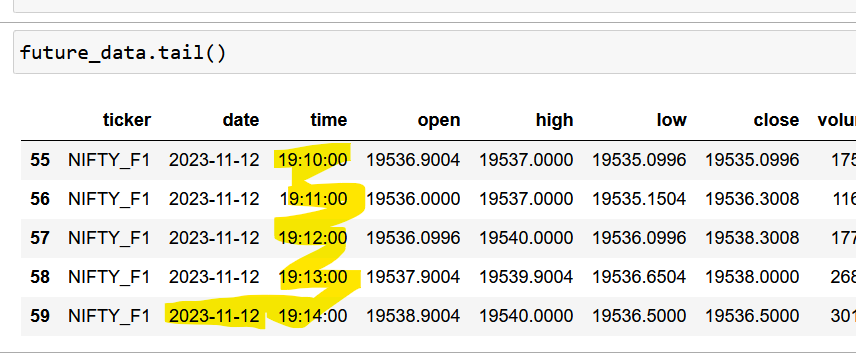
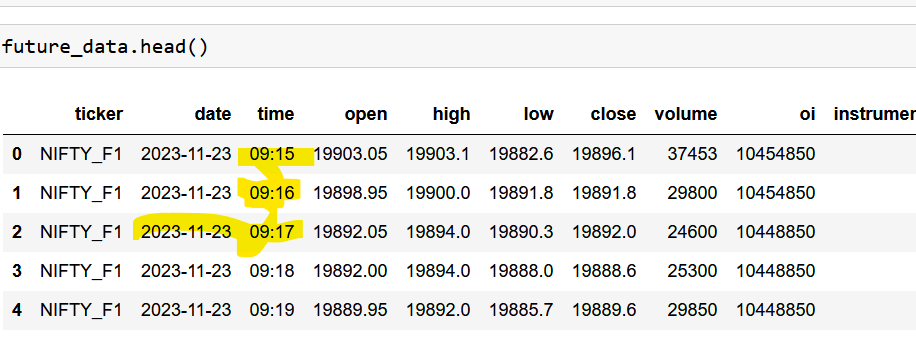

In [200]:
pe_data.head()

,ticker,date,time,open,high,low,close,volume,<OI>,instrument_name,strike_price,instrument_type,expiry_date,expiry_type


In [198]:
entry_datetime = '09:20:00'
exit_datetime = '15:10:00'

# nifty future data & ATM

#on 9:20 open price will be ATM price because that is my entry point
atm=future_data[future_data['time']==entry_datetime]['open'].iloc[0]
base_price=100
atm=base_price*round(atm/base_price) #round off open price to the next multiple of 100 as strike prices are multiple of 100 

# CE data & PE data
nearest_expiry = pd.to_datetime(curr_date).date() + relativedelta(weekday=TH) #weekly expiry
nearest_expiry1 = datetime.datetime.strftime(nearest_expiry, format="%Y-%m-%d") 
nearest_expiry2 = datetime.datetime.strftime(nearest_expiry - datetime.timedelta(days=1), format="%Y-%m-%d")
nearest_expiry3 = datetime.datetime.strftime(nearest_expiry - datetime.timedelta(days=2), format="%Y-%m-%d")
#if nearest thursday is a holiday then weekly expiry happens on wednesday and if wednesday is also a holiday then weekly expiry 
#happens on tuesday

instrument = 'NIFTY'
ce_data=data[(data['instrument_type']=='CE') & (data['instrument_name']==instrument) & (data['strike_price']==atm) & ((data['expiry_date']==nearest_expiry1)|(data['expiry_date']==nearest_expiry2)|(data['expiry_date']==nearest_expiry3))]
ce_data.reset_index(drop=True,inplace=True)
pe_data=data[(data['instrument_type']=='PE') & (data['instrument_name']==instrument) & (data['strike_price']==atm) & ((data['expiry_date']==nearest_expiry1)|(data['expiry_date']==nearest_expiry2)|(data['expiry_date']==nearest_expiry3))]
pe_data.reset_index(drop=True,inplace=True)

#symbol & entry price
ce_symbol=ce_data['ticker'].iloc[0] #ex: NIFTY23010517500CE
pe_symbol=pe_data['ticker'].iloc[0] #ex: NIFTY23010517500PE

future_price= future_data[future_data['time']==entry_datetime]['open'].iloc[0]
ce_entry_price = ce_data[ce_data['time']==entry_datetime]['close'].iloc[0]
pe_entry_price = pe_data[pe_data['time']==entry_datetime]['close'].iloc[0]

#test data
future_data=future_data[['time','close']].set_index(['time'])
ce_data=ce_data[['time','close']].set_index(['time'])
pe_data=pe_data[['time','close']].set_index(['time'])

intraday_data = pd.concat([future_data,ce_data,pe_data],axis=1)
intraday_data.columns = ['future_close','ce_close','pe_close']
intraday_data = intraday_data.ffill()
intraday_data.reset_index(inplace=True)
entry_datetime_index = intraday_data[intraday_data['time']==entry_datetime].index[0]
exit_datetime_index = intraday_data[intraday_data['time']==exit_datetime].index[0]
intraday_data = intraday_data[entry_datetime_index:exit_datetime_index+1]
intraday_data['ce_pnl'] = 0
intraday_data['pe_pnl'] = 0
intraday_data.reset_index(drop=True,inplace=True)
intraday_data.loc[:,'date']=curr_date
intraday_data = intraday_data[['date','time', 'future_close', 'ce_close','pe_close','ce_pnl','pe_pnl']]
intraday_data.head()



IndexError: single positional indexer is out-of-bounds

In [171]:
#stoploss
stop_loss= 20/100
ce_stop_loss = ce_entry_price + ce_entry_price*stop_loss #you have sold call, extrinsic + intrinsic value is increasing which means it is getting ITM 
pe_stop_loss = pe_entry_price + pe_entry_price*stop_loss #you have sold put, extrinsic + intrinsic value is increasing which means it is getting ITM

#backtest
ce_stop_loss_counter=0
pe_stop_loss_counter=0
ce_exit_datetime=''
pe_exit_datetime=''
ce_exit_price=0
pe_exit_price=0
ce_pnl=0
pe_pnl=0
pnl=0

for index, row in intraday_data.iterrows():
    ce_ltp=row['ce_close']
    pe_ltp=row['pe_close']
    #print(f"{row['datetime']}::{ce_ltp}::{pe_ltp}")
    #Exit crateria
    #1. CE & PE didn't hit SL & both reach exit time limit 15:10
    if (ce_stop_loss_counter==0) & (pe_stop_loss_counter==0) & (row['time']==exit_datetime):
        ce_pnl=ce_entry_price - ce_ltp #because i have sold call, so bought back at ltp price
        pe_pnl=pe_entry_price - pe_ltp #because i have sold put, so bought back at ltp price
        ce_stop_loss_counter=1
        pe_stop_loss_counter=1
        ce_exit_datetime=row['time']
        pe_exit_datetime=row['time']
        ce_exit_price=ce_ltp
        pe_exit_price=pe_ltp
        intraday_data.loc[index,'ce_pnl']=ce_pnl
        intraday_data.loc[index,'pe_pnl']=pe_pnl
        print('CE & PE did not hit SL, both exit at 15:10')
        pnl=ce_pnl+pe_pnl
        break 
    #2. CE is now hit SL, none were hit SL till now
    elif (ce_ltp>=ce_stop_loss) & (ce_stop_loss_counter==0) & (pe_stop_loss_counter==0):
        ce_pnl=ce_entry_price - ce_stop_loss #because i have sold call, so bought back at stop_loss
        pe_pnl=pe_entry_price-pe_ltp #because i have sold put, so current pnl as of current put price
        ce_stop_loss_counter=1
        ce_exit_datetime=row['time']
        ce_exit_price=ce_stop_loss
        intraday_data.loc[index,'ce_pnl']=ce_pnl
        intraday_data.loc[index,'pe_pnl']=pe_pnl
        print('CE SL hit')
        pnl=ce_pnl+pe_pnl

    #3. PE is now hit SL, none were hit SL till now
    elif (pe_ltp>=pe_stop_loss) & (ce_stop_loss_counter==0) & (pe_stop_loss_counter==0):
        ce_pnl=ce_entry_price-ce_ltp #because i have sold call, so current pnl as of current call price
        pe_pnl=pe_entry_price-pe_stop_loss 
        pe_stop_loss_counter=1
        pe_exit_datetime=row['time']
        pe_exit_price=pe_stop_loss
        intraday_data.loc[index,'ce_pnl']=ce_pnl
        intraday_data.loc[index,'pe_pnl']=pe_pnl
        print('PE SL hit')
        pnl=ce_pnl+pe_pnl
    #4. CE was hit SL, (PE is either hit SL or reach exit time limit 15:10)
    elif (ce_stop_loss_counter==1) & (pe_stop_loss_counter==0):
        if (pe_ltp>=pe_stop_loss) & (row['time']<exit_datetime):
            pe_pnl=pe_entry_price-pe_stop_loss
            pe_stop_loss_counter=1
            pe_exit_datetime=row['time']
            pe_exit_price=pe_stop_loss
            intraday_data.loc[index,'ce_pnl']=ce_pnl
            intraday_data.loc[index,'pe_pnl']=pe_pnl
            print('PE SL hit')
            pnl=ce_pnl+pe_pnl
            break
        elif (row['time']==exit_datetime):
            pe_pnl=pe_entry_price-pe_ltp
            pe_stop_loss_counter=1
            pe_exit_datetime=row['time']
            pe_exit_price=pe_ltp
            intraday_data.loc[index,'ce_pnl']=ce_pnl
            intraday_data.loc[index,'pe_pnl']=pe_pnl
            print('PE exit at 15:10')
            pnl=ce_pnl+pe_pnl
            break     
    #5. PE was hit SL, (CE is either hit SL or reach exit time limit 15:10)
    elif (pe_stop_loss_counter==1) & (ce_stop_loss_counter==0):
        if (ce_ltp>=ce_stop_loss) & (row['time']<exit_datetime):
            ce_pnl=ce_entry_price-ce_stop_loss
            ce_stop_loss_counter=1
            ce_exit_datetime=row['time']
            ce_exit_price=ce_stop_loss
            intraday_data.loc[index,'ce_pnl']=ce_pnl
            intraday_data.loc[index,'pe_pnl']=pe_pnl
            print('CE SL hit')
            pnl=ce_pnl+pe_pnl
            break
        elif (row['time']==exit_datetime):
            ce_pnl=ce_entry_price-ce_ltp
            ce_stop_loss_counter=1
            ce_exit_datetime=row['time']
            ce_exit_price=ce_ltp
            intraday_data.loc[index,'ce_pnl']=ce_pnl
            intraday_data.loc[index,'pe_pnl']=pe_pnl
            print('CE exit at 15:10')
            pnl=ce_pnl+pe_pnl
            break
    #6. update pnl in normal time
    elif ((ce_stop_loss_counter==0 & pe_stop_loss_counter==0) | (ce_stop_loss_counter==1 & pe_stop_loss_counter==0) | (ce_stop_loss_counter==0 & pe_stop_loss_counter==1) | (ce_stop_loss_counter==1 & pe_stop_loss_counter==1)) or (row['time']<exit_datetime):
        ce_pnl=ce_entry_price-ce_ltp
        pe_pnl=pe_entry_price-pe_ltp
        intraday_data.loc[index,'ce_pnl']=ce_pnl
        intraday_data.loc[index,'pe_pnl']=pe_pnl
        pnl=ce_pnl+pe_pnl
#         print(entry_datetime, future_price, atm, (nearest_expiry-entry_datetime.date()).days,
#         ce_symbol, ce_entry_price, ce_exit_price, ce_exit_datetime, ce_pnl, 
#         pe_symbol, pe_entry_price, pe_exit_price, pe_exit_datetime, pe_pnl, 
#         pnl
#         )



trade_log=pd.concat([trade_log,pd.DataFrame(data = {
                            'Entry_date':curr_date,                         
                            'Entry_date_time': entry_datetime,
                            'Future_price': future_price,
                            'ATM': atm, 
                            'Days_to_expiry': (nearest_expiry - pd.to_datetime(curr_date).date()).days,
                            'CE_symbol': ce_symbol,
                            'CE_entry_price':ce_entry_price,
                            'CE_exit_price': ce_exit_price,
                            'CE_exit_datetime': ce_exit_datetime,
                            'CE_pnl': ce_pnl,
                            'PE_symbol': pe_symbol,
                            'PE_entry_price': pe_entry_price,
                            'PE_exit_price': pe_exit_price,
                            'PE_exit_datetime': pe_exit_datetime,
                            'PE_pnl':pe_pnl, 
                            'Total_pnl': pnl}, index = [0])])

PE SL hit
CE exit at 15:10


In [172]:
pe_pnl

-26.889999999999986

In [173]:
trade_log.tail()

,Entry_date,Entry_date_time,Future_price,ATM,Days_to_expiry,CE_symbol,CE_entry_price,CE_exit_price,CE_exit_datetime,CE_pnl,PE_symbol,PE_entry_price,PE_exit_price,PE_exit_datetime,PE_pnl,Total_pnl
0,2023-10-25,09:20:00,19329.5508,19300,1,NIFTY23102619300CE,85.45,11.25,15:10:00,74.20,NIFTY23102619300PE,53.65,64.38,09:25:00,-10.73,63.47
0,2023-10-27,09:20:00,19021.5508,19000,6,NIFTY23110219000CE,101.35,121.62,09:35:00,-20.27,NIFTY23110219000PE,144.35,83.60,15:10:00,60.75,40.48
0,2023-10-30,09:20:00,19100.4004,19100,3,NIFTY23110219100CE,73.30,87.96,10:45:00,-14.66,NIFTY23110219100PE,131.90,158.28,09:30:00,-26.38,-41.04
0,2023-10-31,09:20:00,19224.8496,19200,2,NIFTY23110219200CE,69.95,39.05,15:10:00,30.90,NIFTY23110219200PE,101.85,122.22,09:47:00,-20.37,10.53
0,2023-11-01,09:20:00,19156.5000,19200,1,NIFTY23110219200CE,32.90,5.55,15:10:00,27.35,NIFTY23110219200PE,134.45,161.34,09:48:00,-26.89,0.46


In [166]:
trade_log[trade_log['Entry_date']==curr_date]

,Entry_date,Entry_date_time,Future_price,ATM,Days_to_expiry,CE_symbol,CE_entry_price,CE_exit_price,CE_exit_datetime,CE_pnl,PE_symbol,PE_entry_price,PE_exit_price,PE_exit_datetime,PE_pnl,Total_pnl


In [192]:
def monthly_return(month, trade_log):
    
    df_month, futuredata = monthly_data(month)
    
    map_ ={
    
    '2023-05-12':'2023-12-05',
    '2023-01-12':'2023-12-01',
    '2023-04-12':'2023-12-04',
    '2023-06-12':'2023-12-06',    
    '2023-07-12':'2023-12-07',    
    '2023-08-12':'2023-12-08',
    '2023-11-12':'2023-12-11'   
      
      }
    
    df_month['date'].replace(map_, inplace=True)
    futuredata['date'].replace(map_, inplace=True)
    
    for curr_date in df_month['date'].unique().tolist():
            try:
                
                data = df_month[df_month['date']==curr_date]
                future_data = futuredata[futuredata['date']==curr_date]
                future_data.reset_index(drop=True,inplace=True)

                #entry_datetime=datetime.datetime.combine(pd.to_datetime(curr_date).date,datetime.time(9,20))
                #exit_datetime=datetime.datetime.combine(pd.to_datetime(curr_date).date,datetime.time(15,10))

                entry_datetime = '09:20:00'
                exit_datetime = '15:10:00'
                
                # nifty future data & ATM

                #on 9:20 open price will be ATM price because that is my entry point
                atm=future_data[future_data['time']==entry_datetime]['open'].iloc[0]
                base_price=100
                atm=base_price*round(atm/base_price) #round off open price to the next multiple of 100 as strike prices are multiple of 100 

                # CE data & PE data
                nearest_expiry = pd.to_datetime(curr_date).date() + relativedelta(weekday=TH) #weekly expiry
                nearest_expiry1 = datetime.datetime.strftime(nearest_expiry, format="%Y-%m-%d") 
                nearest_expiry2 = datetime.datetime.strftime(nearest_expiry - datetime.timedelta(days=1), format="%Y-%m-%d")
                nearest_expiry3 = datetime.datetime.strftime(nearest_expiry - datetime.timedelta(days=2), format="%Y-%m-%d")
                #if nearest thursday is a holiday then weekly expiry happens on wednesday and if wednesday is also a holiday then weekly expiry 
                #happens on tuesday
                
                instrument = 'NIFTY'
                ce_data=data[(data['instrument_type']=='CE') & (data['instrument_name']==instrument) & (data['strike_price']==atm) & ((data['expiry_date']==nearest_expiry1)|(data['expiry_date']==nearest_expiry2)|(data['expiry_date']==nearest_expiry3))]
                ce_data.reset_index(drop=True,inplace=True)
                pe_data=data[(data['instrument_type']=='PE') & (data['instrument_name']==instrument) & (data['strike_price']==atm) & ((data['expiry_date']==nearest_expiry1)|(data['expiry_date']==nearest_expiry2)|(data['expiry_date']==nearest_expiry3))]
                pe_data.reset_index(drop=True,inplace=True)

                #symbol & entry price
                ce_symbol=ce_data['ticker'].iloc[0] #ex: NIFTY23010517500CE
                pe_symbol=pe_data['ticker'].iloc[0] #ex: NIFTY23010517500PE

                future_price= future_data[future_data['time']==entry_datetime]['open'].iloc[0]
                ce_entry_price = ce_data[ce_data['time']==entry_datetime]['close'].iloc[0]
                pe_entry_price = pe_data[pe_data['time']==entry_datetime]['close'].iloc[0]

                #test data
                future_data=future_data[['time','close']].set_index(['time'])
                ce_data=ce_data[['time','close']].set_index(['time'])
                pe_data=pe_data[['time','close']].set_index(['time'])

                intraday_data = pd.concat([future_data,ce_data,pe_data],axis=1)
                intraday_data.columns = ['future_close','ce_close','pe_close']
                intraday_data = intraday_data.ffill()
                intraday_data.reset_index(inplace=True)
                entry_datetime_index = intraday_data[intraday_data['time']==entry_datetime].index[0]
                exit_datetime_index = intraday_data[intraday_data['time']==exit_datetime].index[0]
                intraday_data = intraday_data[entry_datetime_index:exit_datetime_index+1]
                intraday_data['ce_pnl'] = 0
                intraday_data['pe_pnl'] = 0
                intraday_data.loc[:,'date']=curr_date
                intraday_data = intraday_data[['date','time', 'future_close', 'ce_close','pe_close','ce_pnl','pe_pnl']]
                intraday_data.reset_index(drop=True,inplace=True)

                #stoploss
                stop_loss= 20/100
                ce_stop_loss = ce_entry_price + ce_entry_price*stop_loss #you have sold call, extrinsic + intrinsic value is increasing which means it is getting ITM 
                pe_stop_loss = pe_entry_price + pe_entry_price*stop_loss #you have sold put, extrinsic + intrinsic value is increasing which means it is getting ITM

                #backtest
                ce_stop_loss_counter=0
                pe_stop_loss_counter=0
                ce_exit_datetime=''
                pe_exit_datetime=''
                ce_exit_price=0
                pe_exit_price=0
                ce_pnl=0
                pe_pnl=0
                pnl=0

                for index, row in intraday_data.iterrows():
                    ce_ltp=row['ce_close']
                    pe_ltp=row['pe_close']
                    #print(f"{row['datetime']}::{ce_ltp}::{pe_ltp}")
                    #Exit crateria
                    #1. CE & PE didn't hit SL & both reach exit time limit 15:10
                    if (ce_stop_loss_counter==0) & (pe_stop_loss_counter==0) & (row['time']==exit_datetime):
                        ce_pnl=ce_entry_price - ce_ltp #because i have sold call, so bought back at ltp price
                        pe_pnl=pe_entry_price - pe_ltp #because i have sold put, so bought back at ltp price
                        ce_stop_loss_counter=1
                        pe_stop_loss_counter=1
                        ce_exit_datetime=row['time']
                        pe_exit_datetime=row['time']
                        ce_exit_price=ce_ltp
                        pe_exit_price=pe_ltp
                        intraday_data.loc[index,'ce_pnl']=ce_pnl
                        intraday_data.loc[index,'pe_pnl']=pe_pnl
                        #print('CE & PE did not hit SL, both exit at 15:10')
                        pnl=ce_pnl+pe_pnl
                        break 
                    #2. CE is now hit SL, none were hit SL till now
                    elif (ce_ltp>=ce_stop_loss) & (ce_stop_loss_counter==0) & (pe_stop_loss_counter==0):
                        ce_pnl=ce_entry_price - ce_stop_loss #because i have sold call, so bought back at stop_loss
                        pe_pnl=pe_entry_price-pe_ltp #because i have sold put, so current pnl as of current put price
                        ce_stop_loss_counter=1
                        ce_exit_datetime=row['time']
                        ce_exit_price=ce_stop_loss
                        intraday_data.loc[index,'ce_pnl']=ce_pnl
                        intraday_data.loc[index,'pe_pnl']=pe_pnl
                        #print('CE SL hit')
                        pnl=ce_pnl+pe_pnl

                    #3. PE is now hit SL, none were hit SL till now
                    elif (pe_ltp>=pe_stop_loss) & (ce_stop_loss_counter==0) & (pe_stop_loss_counter==0):
                        ce_pnl=ce_entry_price-ce_ltp #because i have sold call, so current pnl as of current call price
                        pe_pnl=pe_entry_price-pe_stop_loss 
                        pe_stop_loss_counter=1
                        pe_exit_datetime=row['time']
                        pe_exit_price=pe_stop_loss
                        intraday_data.loc[index,'ce_pnl']=ce_pnl
                        intraday_data.loc[index,'pe_pnl']=pe_pnl
                        #print('PE SL hit')
                        pnl=ce_pnl+pe_pnl
                    #4. CE was hit SL, (PE is either hit SL or reach exit time limit 15:10)
                    elif (ce_stop_loss_counter==1) & (pe_stop_loss_counter==0):
                        if (pe_ltp>=pe_stop_loss) & (row['time']<exit_datetime):
                            pe_pnl=pe_entry_price-pe_stop_loss
                            pe_stop_loss_counter=1
                            pe_exit_datetime=row['time']
                            pe_exit_price=pe_stop_loss
                            intraday_data.loc[index,'ce_pnl']=ce_pnl
                            intraday_data.loc[index,'pe_pnl']=pe_pnl
                            #print('PE SL hit')
                            pnl=ce_pnl+pe_pnl
                            break
                        elif (row['time']==exit_datetime):
                            pe_pnl=pe_entry_price-pe_ltp
                            pe_stop_loss_counter=1
                            pe_exit_datetime=row['time']
                            pe_exit_price=pe_ltp
                            intraday_data.loc[index,'ce_pnl']=ce_pnl
                            intraday_data.loc[index,'pe_pnl']=pe_pnl
                            #print('PE exit at 15:10')
                            pnl=ce_pnl+pe_pnl
                            break     
                    #5. PE was hit SL, (CE is either hit SL or reach exit time limit 15:10)
                    elif (pe_stop_loss_counter==1) & (ce_stop_loss_counter==0):
                        if (ce_ltp>=ce_stop_loss) & (row['time']<exit_datetime):
                            ce_pnl=ce_entry_price-ce_stop_loss
                            ce_stop_loss_counter=1
                            ce_exit_datetime=row['time']
                            ce_exit_price=ce_stop_loss
                            intraday_data.loc[index,'ce_pnl']=ce_pnl
                            intraday_data.loc[index,'pe_pnl']=pe_pnl
                            #print('CE SL hit')
                            pnl=ce_pnl+pe_pnl
                            break
                        elif (row['time']==exit_datetime):
                            ce_pnl=ce_entry_price-ce_ltp
                            ce_stop_loss_counter=1
                            ce_exit_datetime=row['time']
                            ce_exit_price=ce_ltp
                            intraday_data.loc[index,'ce_pnl']=ce_pnl
                            intraday_data.loc[index,'pe_pnl']=pe_pnl
                            #print('CE exit at 15:10')
                            pnl=ce_pnl+pe_pnl
                            break
                    #6. update pnl in normal time
                    elif ((ce_stop_loss_counter==0 & pe_stop_loss_counter==0) | (ce_stop_loss_counter==1 & pe_stop_loss_counter==0) | (ce_stop_loss_counter==0 & pe_stop_loss_counter==1) | (ce_stop_loss_counter==1 & pe_stop_loss_counter==1)) or (row['time']<exit_datetime):
                        ce_pnl=ce_entry_price-ce_ltp
                        pe_pnl=pe_entry_price-pe_ltp
                        intraday_data.loc[index,'ce_pnl']=ce_pnl
                        intraday_data.loc[index,'pe_pnl']=pe_pnl
                        pnl=ce_pnl+pe_pnl
        #         print(entry_datetime, future_price, atm, (nearest_expiry-entry_datetime.date()).days,
        #         ce_symbol, ce_entry_price, ce_exit_price, ce_exit_datetime, ce_pnl, 
        #         pe_symbol, pe_entry_price, pe_exit_price, pe_exit_datetime, pe_pnl, 
        #         pnl
        #         )



                trade_log=pd.concat([trade_log,pd.DataFrame(data = {
                                            'Entry_date':curr_date,                         
                                            'Entry_date_time': entry_datetime,
                                            'Future_price': future_price,
                                            'ATM': atm, 
                                            'Days_to_expiry': (nearest_expiry - pd.to_datetime(curr_date).date()).days,
                                            'CE_symbol': ce_symbol,
                                            'CE_entry_price':ce_entry_price,
                                            'CE_exit_price': ce_exit_price,
                                            'CE_exit_datetime': ce_exit_datetime,
                                            'CE_pnl': ce_pnl,
                                            'PE_symbol': pe_symbol,
                                            'PE_entry_price': pe_entry_price,
                                            'PE_exit_price': pe_exit_price,
                                            'PE_exit_datetime': pe_exit_datetime,
                                            'PE_pnl':pe_pnl, 
                                            'Total_pnl': pnl}, index = [0])])
            except Exception as e:

                
                print(curr_date)
        
    return trade_log

In [194]:
trade_log.tail()

,Entry_date,Entry_date_time,Future_price,ATM,Days_to_expiry,CE_symbol,CE_entry_price,CE_exit_price,CE_exit_datetime,CE_pnl,PE_symbol,PE_entry_price,PE_exit_price,PE_exit_datetime,PE_pnl,Total_pnl
0,2023-12-22,09:20:00,21335.4492,21300,6,NIFTY23122821300CE,144.60,173.52,09:48:00,-28.92,NIFTY23122821300PE,123.45,82.60,15:10:00,40.85,11.93
0,2023-12-26,09:20:00,21386.9004,21400,2,NIFTY23122821400CE,100.65,120.78,09:59:00,-20.13,NIFTY23122821400PE,110.50,69.60,15:10:00,40.90,20.77
0,2023-12-27,09:20:00,21540.0996,21500,1,NIFTY23122821500CE,104.60,125.52,09:44:00,-20.92,NIFTY23122821500PE,59.25,17.85,15:10:00,41.40,20.48
0,2023-12-28,09:20:00,21738.3008,21700,0,NIFTY23122821700CE,89.95,72.75,15:10:00,17.20,NIFTY23122821700PE,37.50,45.00,10:04:00,-7.50,9.70
0,2023-12-29,09:20:00,21878.7500,21900,6,NIFTY24010421900CE,97.20,84.75,15:10:00,12.45,NIFTY24010421900PE,226.50,271.80,10:14:00,-45.30,-32.85


In [193]:

# trade_log=pd.DataFrame(columns=['Entry_date','Entry_date_time', 'Future_price', 'ATM', 'Days_to_expiry',
#           'CE_symbol','CE_entry_price','CE_exit_price','CE_exit_datetime','CE_pnl',
#           'PE_symbol','PE_entry_price','PE_exit_price','PE_exit_datetime','PE_pnl', 'Total_pnl'])

# all_month = ['2023-01','2023-02','2023-03','2023-04','2023-05','2023-06','2023-07','2023-08','2023-09','2023-10',

all_month = ['2023-11','2023-12']
trade_log = monthly_return('2023-12', trade_log)
# for month in all_month:
#     trade_log = monthly_return(month, trade_log)

# trade_log

2023-12-01


In [3]:
#result is saved here
# trade_log.to_csv('result_short_straddle23.csv')
import os
os.getcwd()
os.chdir("D:\\AlgoTest\\")

In [9]:
trade_log = pd.read_csv('D:\\AlgoTest\\result_short_straddle23.csv')
trade_log.drop(columns=['Unnamed: 0'], inplace=True)
trade_log.head()

,Entry_date,Entry_date_time,Future_price,ATM,Days_to_expiry,CE_symbol,CE_entry_price,CE_exit_price,CE_exit_datetime,CE_pnl,PE_symbol,PE_entry_price,PE_exit_price,PE_exit_datetime,PE_pnl,Total_pnl
0,2023-01-02,09:20:00,18198.25,18200,3,NIFTY23010518200CE,70.80,84.96,09:44:00,-14.16,NIFTY23010518200PE,143.90,87.95,15:10:00,55.95,41.79
1,2023-01-03,09:20:00,18230.70,18200,2,NIFTY23010518200CE,73.15,87.78,09:46:00,-14.63,NIFTY23010518200PE,104.85,50.40,15:10:00,54.45,39.82
2,2023-01-04,09:20:00,18270.40,18300,1,NIFTY23010518300CE,33.05,7.05,15:10:00,26.00,NIFTY23010518300PE,115.65,138.78,09:39:00,-23.13,2.87
3,2023-01-05,09:20:00,18123.20,18100,0,NIFTY23010518100CE,28.60,34.32,09:26:00,-5.72,NIFTY23010518100PE,71.65,85.98,09:23:00,-14.33,-20.05
4,2023-01-06,09:20:00,18066.20,18100,6,NIFTY23011218100CE,77.95,93.54,09:35:00,-15.59,NIFTY23011218100PE,168.15,201.78,10:40:00,-33.63,-49.22


In [12]:
trade_log['Entry_date'] = [pd.to_datetime(i) for i in trade_log['Entry_date']]

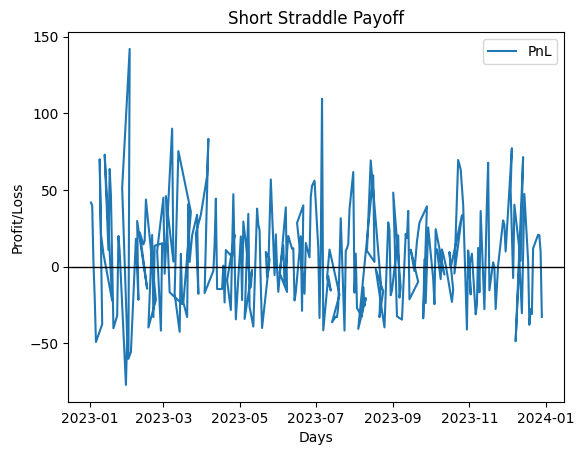

In [62]:
plt.plot(trade_log['Entry_date'].values, trade_log['Total_pnl'].values, label='PnL')
plt.axhline(0, color='black', lw=1)
plt.title('Short Straddle Payoff')
plt.xlabel('Days')
plt.ylabel('Profit/Loss')
plt.legend()
plt.show()

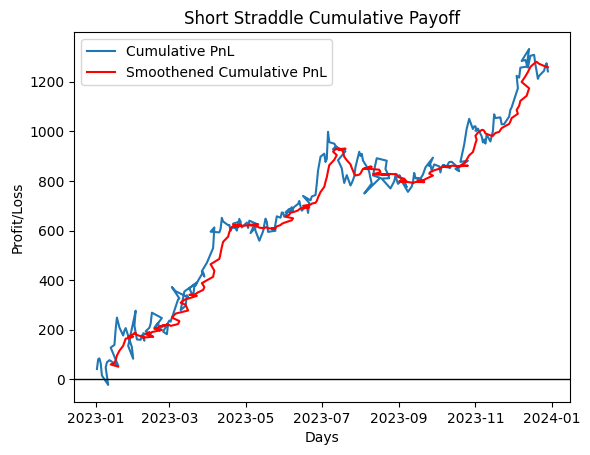

In [73]:
y1 = trade_log['Total_pnl'].cumsum().values
y2 = trade_log['Total_pnl'].cumsum().rolling(10).mean().values
plt.plot(trade_log['Entry_date'].values, y1, label='Cumulative PnL')
plt.plot(trade_log['Entry_date'].values, y2, label='Smoothened Cumulative PnL', color = 'red')
plt.axhline(0, color='black', lw=1)
plt.title('Short Straddle Cumulative Payoff')
plt.xlabel('Days')
plt.ylabel('Profit/Loss')
plt.legend()
plt.show()

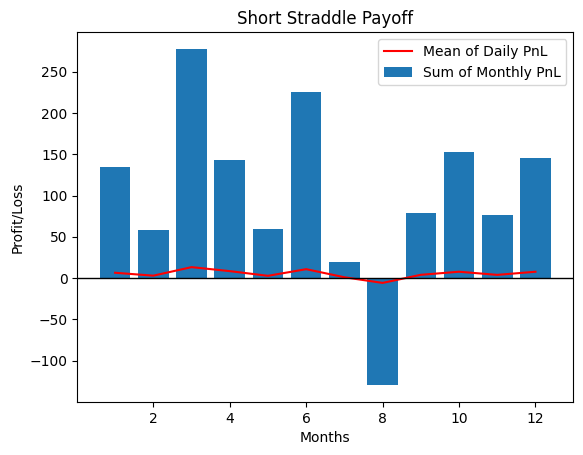

In [40]:
y1 = trade_log.groupby([pd.Series(trade_log['Entry_date']).dt.month])['Total_pnl'].sum().values
y2 = trade_log.groupby([pd.Series(trade_log['Entry_date']).dt.month])['Total_pnl'].mean().values
plt.bar(np.arange(1, 13),y1, label='Sum of Monthly PnL',)
plt.plot(np.arange(1, 13),y2, label='Mean of Daily PnL',color='red')
plt.axhline(0, color='black', lw=1)
plt.title('Short Straddle Payoff')
plt.xlabel('Months')
plt.ylabel('Profit/Loss')
plt.legend()
plt.show()


In [47]:
pd.Series(trade_log['Total_pnl']).mean()

5.088237704918033

In [56]:
returns = trade_log['Total_pnl'].cumsum().pct_change()

C:\Users\avi\anaconda3\envs\env_zipline\lib\site-packages\empyrical\stats.py:1495: RuntimeWarning: invalid value encountered in log1p
  cum_log_returns = np.log1p(returns).cumsum()
C:\Users\avi\anaconda3\envs\env_zipline\lib\site-packages\pyfolio\plotting.py:651: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '3220.3%' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  perf_stats.loc[stat, column] = str(np.round(value * 100,


Start date,2023-01-02
End date,2023-12-29
Total months,11
,Backtest
Annual return,3220.3%
Cumulative returns,2870.9%
Annual volatility,485.3%
Sharpe ratio,-0.10
Calmar ratio,25.45
Stability,NaN
Max drawdown,-126.5%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,126.52,2023-01-04,2023-01-11,2023-01-13,8
1,66.58,2023-01-18,2023-01-31,2023-02-02,12
2,43.62,2023-02-02,2023-02-09,2023-03-08,25
3,25.02,2023-03-03,2023-03-10,2023-03-23,15
4,24.91,2023-07-06,2023-08-04,2023-10-25,80


C:\Users\avi\anaconda3\envs\env_zipline\lib\site-packages\pyfolio\plotting.py:1304: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.boxplot(data=[is_returns, is_weekly, is_monthly],


UnboundLocalError: local variable 'boxprops' referenced before assignment

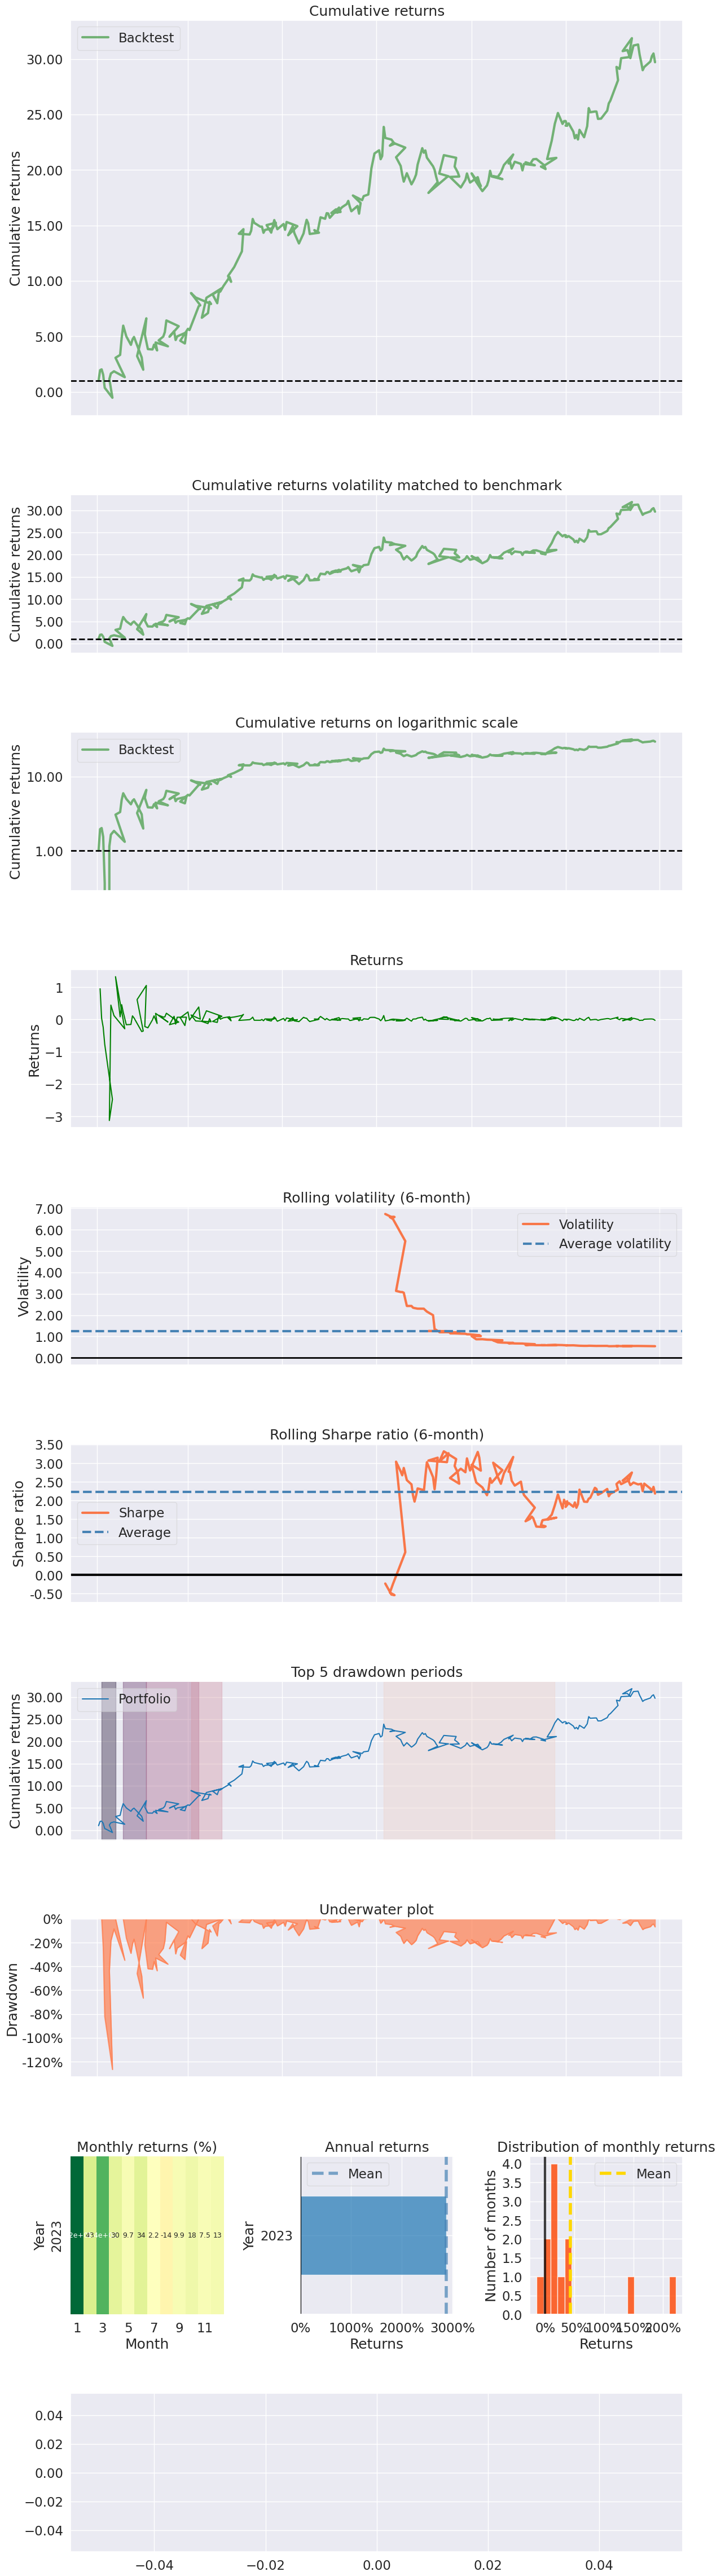

In [61]:
import pyfolio as pf
pf.create_returns_tear_sheet(pd.Series(returns.values, index = trade_log['Entry_date'].values), benchmark_rets = None)

2023-01-02         NaN
2023-01-03    0.952860
2023-01-04    0.035167
2023-01-05   -0.237334
2023-01-06   -0.763930
                ...   
2023-12-22    0.009847
2023-12-26    0.016977
2023-12-27    0.016460
2023-12-28    0.007670
2023-12-29   -0.025777
Length: 244, dtype: float64

In [58]:
returns

0           NaN
1      0.952860
2      0.035167
3     -0.237334
4     -0.763930
         ...   
239    0.009847
240    0.016977
241    0.016460
242    0.007670
243   -0.025777
Name: Total_pnl, Length: 244, dtype: float64